# Install packages

In [579]:
!pip install matplotlib pandas

# Basic Data Analysis

#### Converting data into csv file

In [580]:
import warnings
warnings.filterwarnings('ignore')

In [706]:
#Convert ymal data into json

In [721]:
import os
import yaml
import json

class DateTimeEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, (date, datetime)):
            return obj.isoformat()
        return super().default(obj)

def convert_yaml_to_json(yaml_folder, json_folder):
    os.makedirs(json_folder, exist_ok=True)
    for filename in os.listdir(yaml_folder):
        if filename.endswith('.yaml') or filename.endswith('.yml'):
            yaml_path = os.path.join(yaml_folder, filename)
            json_path = os.path.join(json_folder, filename.replace('.yaml', '.json').replace('.yml', '.json'))

            with open(yaml_path, 'r') as yaml_file:
                data = yaml.safe_load(yaml_file)

            with open(json_path, 'w') as json_file:
                json.dump(data, json_file, indent=4, cls=DateTimeEncoder)

In [717]:
yaml_folder = 'ipl_yaml'
json_folder = 'converted_ipl_json'

In [720]:
# convert_yaml_to_json(yaml_folder, json_folder)

In [581]:
import os
import json
import pandas as pd

def extract_data(json_data, file_id):
    records = []

    created = json_data['meta'].get('created', None)
    city = json_data['info'].get('city', None)
    dates = json_data['info'].get('dates', [None])[0]
    outcome_winner = json_data['info'].get('outcome', {}).get('winner', None)
    outcome_by = json_data['info'].get('outcome', {}).get('by', {})
    outcome_by_runs = outcome_by.get('runs', None)
    outcome_by_wickets = outcome_by.get('wickets', None)
    player_of_match = json_data['info'].get('player_of_match', [None])[0]
    team_1 = json_data['info']['teams'][0]
    team_2 = json_data['info']['teams'][1]
    season = json_data['info'].get('season', None)
    toss_winner = json_data['info'].get('toss', {}).get('winner', None)
    toss_decision = json_data['info'].get('toss', {}).get('decision', None)
    venue = json_data['info'].get('venue', None)
    
    for inning in json_data.get('innings', []):
        team = inning.get('team', None)
        for over in inning.get('overs', []):
            over_number = over.get('over', None)
            for ball_number, delivery in enumerate(over.get('deliveries', []), start=1):
                record = {
                    'id': file_id,
                    'created': created,
                    'city': city,
                    'dates': dates,
                    'outcome_winner': outcome_winner,
                    'outcome_by_runs': outcome_by_runs,
                    'outcome_by_wickets': outcome_by_wickets,
                    'player_of_match' : player_of_match,
                    'team_1': team_1,
                    'team_2': team_2,
                    'season': season,
                    'toss_winner': toss_winner,
                    'toss_decision': toss_decision,
                    'venue': venue,
                    'team_betting':team,
                    'over_number': over_number,
                    'ball_number': ball_number,
                    'batter': delivery.get('batter', None),
                    'bowler': delivery.get('bowler', None),
                    'non_striker': delivery.get('non_striker', None),
                    'runs_batter': delivery.get('runs', {}).get('batter', None),
                    'runs_extras': delivery.get('runs', {}).get('extras', 0),
                    'runs_total': delivery.get('runs', {}).get('total', None),
                    'wickets_player_out': delivery.get('wickets', [{}])[0].get('player_out', None),
                    'wickets_kind': delivery.get('wickets', [{}])[0].get('kind', None)
                }
                records.append(record)
    
    return records

In [582]:
json_dir = 'ipl_json'
all_records = []

In [583]:
for filename in os.listdir(json_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(json_dir, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            record_data = extract_data(data, filename) 
            all_records.extend(record_data) 

In [724]:
data = pd.DataFrame(all_records)
data.to_csv('all_match_details.csv', index=False)
data.head()

,id,created,city,dates,outcome_winner,outcome_by_runs,outcome_by_wickets,player_of_match,team_1,team_2,...,over_number,ball_number,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind
0,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Punjab Kings,...,0,1,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None
1,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Punjab Kings,...,0,2,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None
2,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Punjab Kings,...,0,3,TM Head,K Rabada,Abhishek Sharma,4,0,4,None,None
3,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Punjab Kings,...,0,4,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None
4,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Punjab Kings,...,0,5,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None


In [725]:
data.shape

(260268, 25)

In [726]:
data.info

<bound method DataFrame.info of                   id     created       city       dates       outcome_winner  \
0       1426261.json  2024-04-09     Mohali  2024-04-09  Sunrisers Hyderabad   
1       1426261.json  2024-04-09     Mohali  2024-04-09  Sunrisers Hyderabad   
2       1426261.json  2024-04-09     Mohali  2024-04-09  Sunrisers Hyderabad   
3       1426261.json  2024-04-09     Mohali  2024-04-09  Sunrisers Hyderabad   
4       1426261.json  2024-04-09     Mohali  2024-04-09  Sunrisers Hyderabad   
...              ...         ...        ...         ...                  ...   
260263  1136596.json  2019-04-19  Hyderabad  2018-05-05  Sunrisers Hyderabad   
260264  1136596.json  2019-04-19  Hyderabad  2018-05-05  Sunrisers Hyderabad   
260265  1136596.json  2019-04-19  Hyderabad  2018-05-05  Sunrisers Hyderabad   
260266  1136596.json  2019-04-19  Hyderabad  2018-05-05  Sunrisers Hyderabad   
260267  1136596.json  2019-04-19  Hyderabad  2018-05-05  Sunrisers Hyderabad   

       

In [727]:
data.describe()

,outcome_by_runs,outcome_by_wickets,over_number,ball_number,runs_batter,runs_extras,runs_total
count,121032.000000,135112.000000,260268.000000,260268.000000,260268.000000,260268.000000,260268.000000
mean,29.712564,6.118694,9.197008,3.624337,1.264865,0.067776,1.332642
std,26.300131,1.832494,5.683883,1.814777,1.638944,0.343248,1.626094
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.000000,5.000000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,22.000000,6.000000,9.000000,4.000000,1.000000,0.000000,1.000000
75%,40.000000,7.000000,14.000000,5.000000,1.000000,0.000000,1.000000
max,146.000000,10.000000,19.000000,11.000000,6.000000,7.000000,7.000000


In [728]:
data.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind'],
      dtype='object')

In [729]:
data['id'].nunique()

1093

In [730]:
data['season'].value_counts()

season
2013       17938
2022       17912
2023       17863
2012       17513
2011       17013
2024       16451
2020/21    14559
2009/10    14498
2021       14425
2019       14312
2014       14300
2018       14286
2016       13849
2009       13606
2007/08    13489
2015       13404
2017       13158
2017         704
2012         254
2015         248
2016         247
2013         239
Name: count, dtype: int64

In [733]:
data['season'].nunique()

22

In [736]:
data['actual_ball'] = data['over_number'] + data['ball_number'] / 10

In [737]:
team_mapping = {
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Punjab Kings': 'Kings XI Punjab',
    'Kings XI Punjab': 'Kings XI Punjab',
    'Delhi Daredevils': 'Delhi Capitals',
    'Sunrisers Hyderabad': 'Sunrisers Hyderabad',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Pune Warriors': 'Rising Pune Supergiant',
    'Gujarat Lions': 'Gujarat Titans'
}

In [738]:
data['outcome_winner'] = data['outcome_winner'].replace(team_mapping)
data['team_1'] = data['team_1'].replace(team_mapping)
data['team_2'] = data['team_2'].replace(team_mapping)
data['toss_winner'] = data['toss_winner'].replace(team_mapping)
data['team_betting'] = data['team_betting'].replace(team_mapping)

In [747]:
city_mapping = {
    'Bengaluru': 'Bangalore',
    'Navi Mumbai': 'Mumbai'
}

In [748]:
data['city'] = data['city'].replace(city_mapping)

In [754]:
data['team_betting'].nunique()

12

In [755]:
data['city'].nunique()

34

In [756]:
data['venue'].nunique()

58

In [810]:
# df = data[data['season'].isin(['2024','2023','2022','2021'])]
df = data

In [742]:
df.shape

(260268, 26)

In [743]:
df.head()

,id,created,city,dates,outcome_winner,outcome_by_runs,outcome_by_wickets,player_of_match,team_1,team_2,...,ball_number,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind,actual_ball
0,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,1,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.1
1,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,2,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.2
2,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,3,TM Head,K Rabada,Abhishek Sharma,4,0,4,None,None,0.3
3,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,4,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.4
4,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,5,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.5


#### Statistical Data Analysis

In [811]:
city_counts = df.groupby('city')['id'].nunique()
city_counts

city
Abu Dhabi          37
Ahmedabad          36
Bangalore          94
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         61
Chennai            83
Cuttack             7
Delhi              90
Dharamsala         13
Dubai              13
Durban             15
East London         3
Guwahati            3
Hyderabad          77
Indore              9
Jaipur             57
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            93
Lucknow            14
Mohali              5
Mumbai            182
Nagpur              3
Port Elizabeth      7
Pune               51
Raipur              6
Rajkot             10
Ranchi              7
Sharjah            10
Visakhapatnam      15
Name: id, dtype: int64

In [812]:
font = {'family': 'Times New Roman',
        'size': 12}

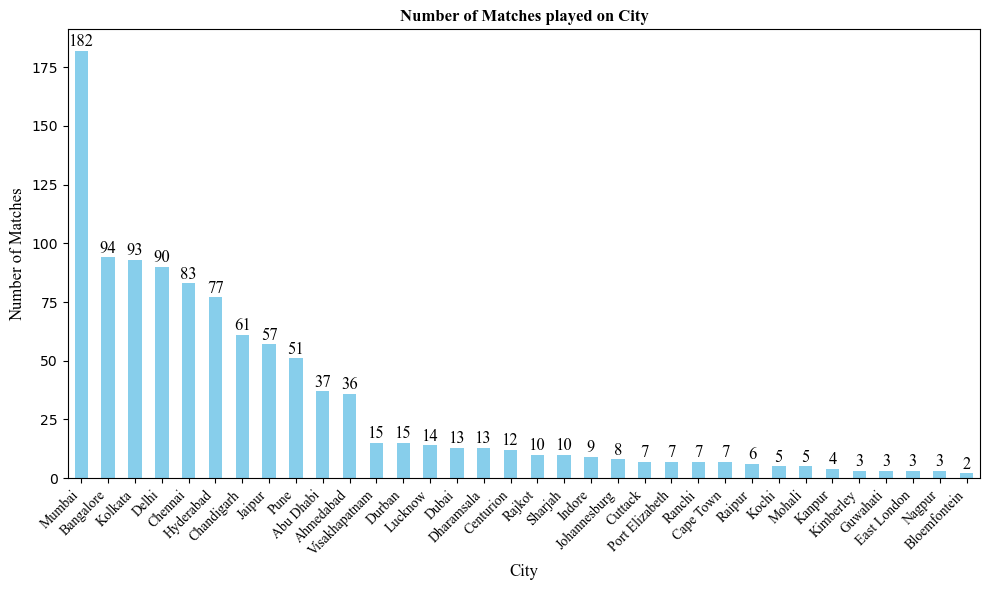

In [813]:
import matplotlib.pyplot as plt
city_counts_sorted = city_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = city_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Matches played on City', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('City', fontdict=font)
plt.ylabel('Number of Matches', fontdict=font)
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')

# Adding value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.3, 
             round(bar.get_height(), 2), 
             ha='center', 
             va='bottom',
             fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig('matches_played_per_city.png')
plt.show()

In [814]:
all_match_counts = df.groupby(['team_betting'])['id'].nunique()
all_match_counts.name = 'total_matches'
all_match_counts

team_betting
Chennai Super Kings            237
Delhi Capitals                 252
Gujarat Titans                  75
Kings XI Punjab                246
Kochi Tuskers Kerala            14
Kolkata Knight Riders          250
Lucknow Super Giants            44
Mumbai Indians                 261
Rajasthan Royals               219
Rising Pune Supergiant          75
Royal Challengers Bangalore    255
Sunrisers Hyderabad            255
Name: total_matches, dtype: int64

In [815]:
winner_counts = df.groupby('outcome_winner')['id'].nunique()
winner_counts.name = 'total_win'
winner_counts

outcome_winner
Chennai Super Kings            138
Delhi Capitals                 112
Gujarat Titans                  41
Kings XI Punjab                109
Kochi Tuskers Kerala             6
Kolkata Knight Riders          129
Lucknow Super Giants            24
Mumbai Indians                 142
Rajasthan Royals               110
Rising Pune Supergiant          27
Royal Challengers Bangalore    121
Sunrisers Hyderabad            115
Name: total_win, dtype: int64

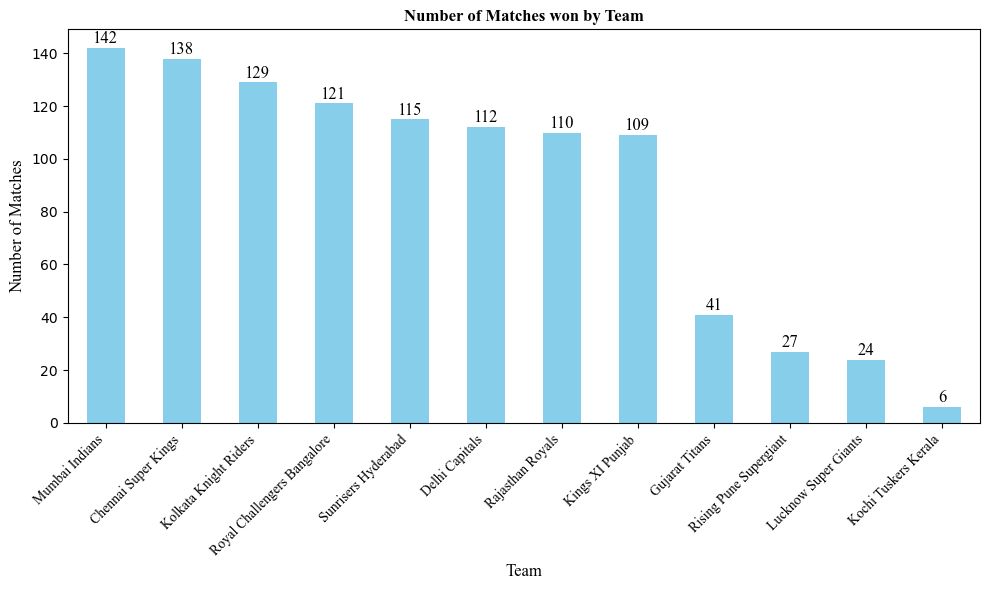

In [816]:
winner_counts_sorted = winner_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = winner_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Matches won by Team', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Team', fontdict=font)
plt.ylabel('Number of Matches', fontdict=font)
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.3, 
             round(bar.get_height(), 2), 
             ha='center', 
             va='bottom',
             fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig('matches_won_by_team.png')
plt.show()

In [817]:
df_win_per = pd.concat([all_match_counts, winner_counts], axis=1)
df_win_per['win_percentage'] = (df_win_per['total_win'] / df_win_per['total_matches']) * 100

In [818]:
df_win_per = df_win_per.sort_values(by='win_percentage', ascending=False)
df_win_per.head()

,total_matches,total_win,win_percentage
Chennai Super Kings,237,138,58.227848
Gujarat Titans,75,41,54.666667
Lucknow Super Giants,44,24,54.545455
Mumbai Indians,261,142,54.406130
Kolkata Knight Riders,250,129,51.600000


In [819]:
teams = df_win_per.index
total_matches = df_win_per['total_matches']
matches_won = df_win_per['total_win']
win_percentage = df_win_per['win_percentage']

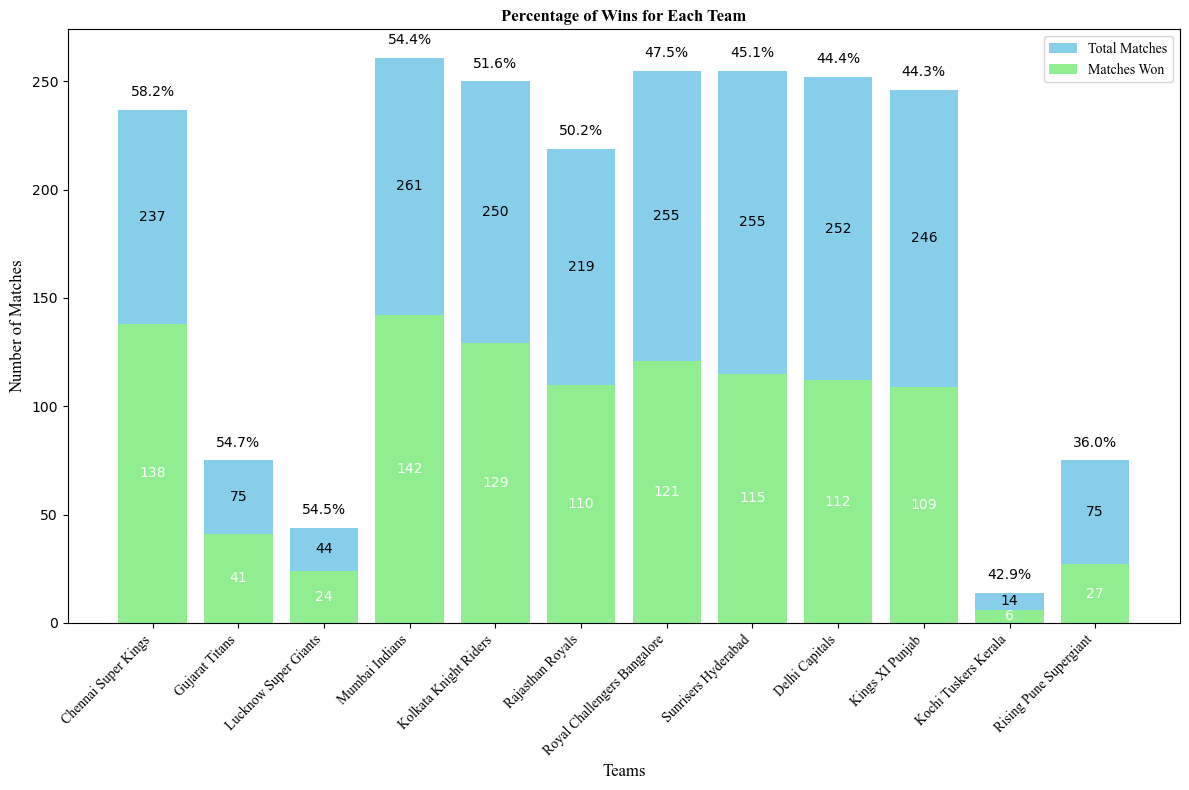

In [820]:
fig, ax = plt.subplots(figsize=(12, 8))
font = {'family': 'Times New Roman', 'size': 12}

ax.bar(teams, total_matches, label='Total Matches', color='skyblue')
ax.bar(teams, matches_won, label='Matches Won', color='lightgreen')

plt.title('Percentage of Wins for Each Team', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Teams', fontdict=font)
plt.ylabel('Number of Matches', fontdict=font)
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')
plt.legend( loc='upper right', fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})

for i in range(len(teams)):
    ax.text(i, matches_won[i] / 2, f'{matches_won[i]}', ha='center', va='center', color='white', fontsize=10)
    ax.text(i, total_matches[i] - (total_matches[i] - matches_won[i]) / 2, f'{total_matches[i]}', ha='center', va='center', color='black', fontsize=10)
    ax.text(i, total_matches[i] + 5, f'{win_percentage[i]:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('win_percentage_for_each_team.png')
plt.show()

In [821]:
toss_winner_counts = df.groupby('toss_winner')['id'].nunique()
toss_winner_counts

toss_winner
Chennai Super Kings            122
Delhi Capitals                 130
Gujarat Titans                  37
Kings XI Punjab                109
Kochi Tuskers Kerala             8
Kolkata Knight Riders          122
Lucknow Super Giants            19
Mumbai Indians                 143
Rajasthan Royals               119
Rising Pune Supergiant          33
Royal Challengers Bangalore    121
Sunrisers Hyderabad            130
Name: id, dtype: int64

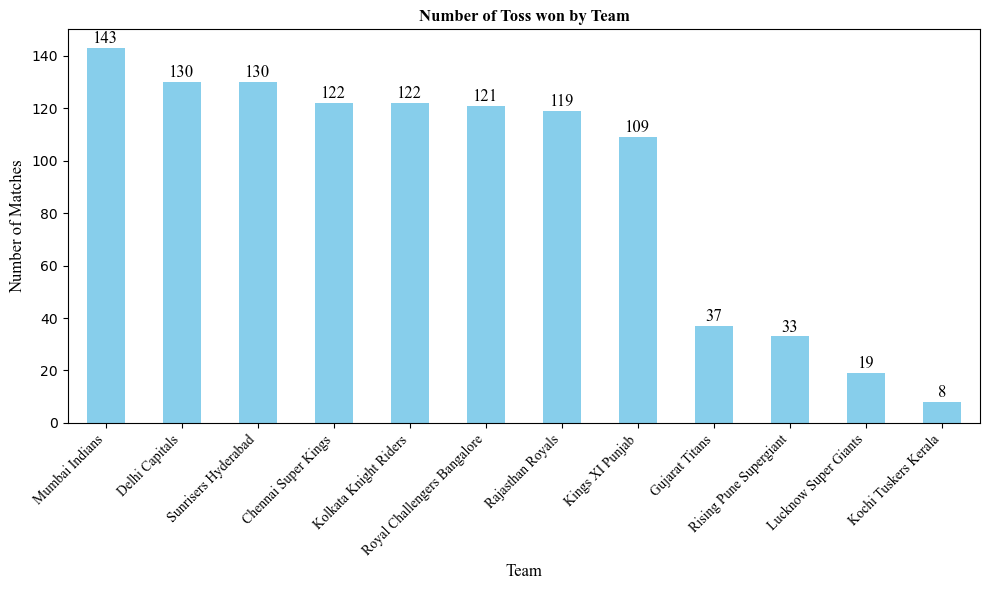

In [822]:
toss_winner_counts_sorted = toss_winner_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = toss_winner_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Toss won by Team', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Team', fontdict=font)
plt.ylabel('Number of Matches', fontdict=font)
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.3, 
             round(bar.get_height(), 2), 
             ha='center', 
             va='bottom',
             fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig('toss_won_by_team.png')
plt.show()

In [823]:
toss_winner_counts = df.groupby('toss_winner')['id'].nunique()
toss_winner_counts.name = 'toss_winner'
toss_winner_counts

toss_winner
Chennai Super Kings            122
Delhi Capitals                 130
Gujarat Titans                  37
Kings XI Punjab                109
Kochi Tuskers Kerala             8
Kolkata Knight Riders          122
Lucknow Super Giants            19
Mumbai Indians                 143
Rajasthan Royals               119
Rising Pune Supergiant          33
Royal Challengers Bangalore    121
Sunrisers Hyderabad            130
Name: toss_winner, dtype: int64

In [824]:
df_toss_win_per = pd.concat([all_match_counts, toss_winner_counts], axis=1)
df_toss_win_per['win_percentage'] = (df_toss_win_per['toss_winner'] / df_toss_win_per['total_matches']) * 100
df_toss_win_per = df_toss_win_per.sort_values(by='win_percentage', ascending=False)
df_toss_win_per.head(1)

,total_matches,toss_winner,win_percentage
Kochi Tuskers Kerala,14,8,57.142857


In [825]:
teams = df_toss_win_per.index
total_matches = df_toss_win_per['total_matches']
matches_won = df_toss_win_per['toss_winner']
win_percentage = df_toss_win_per['win_percentage']

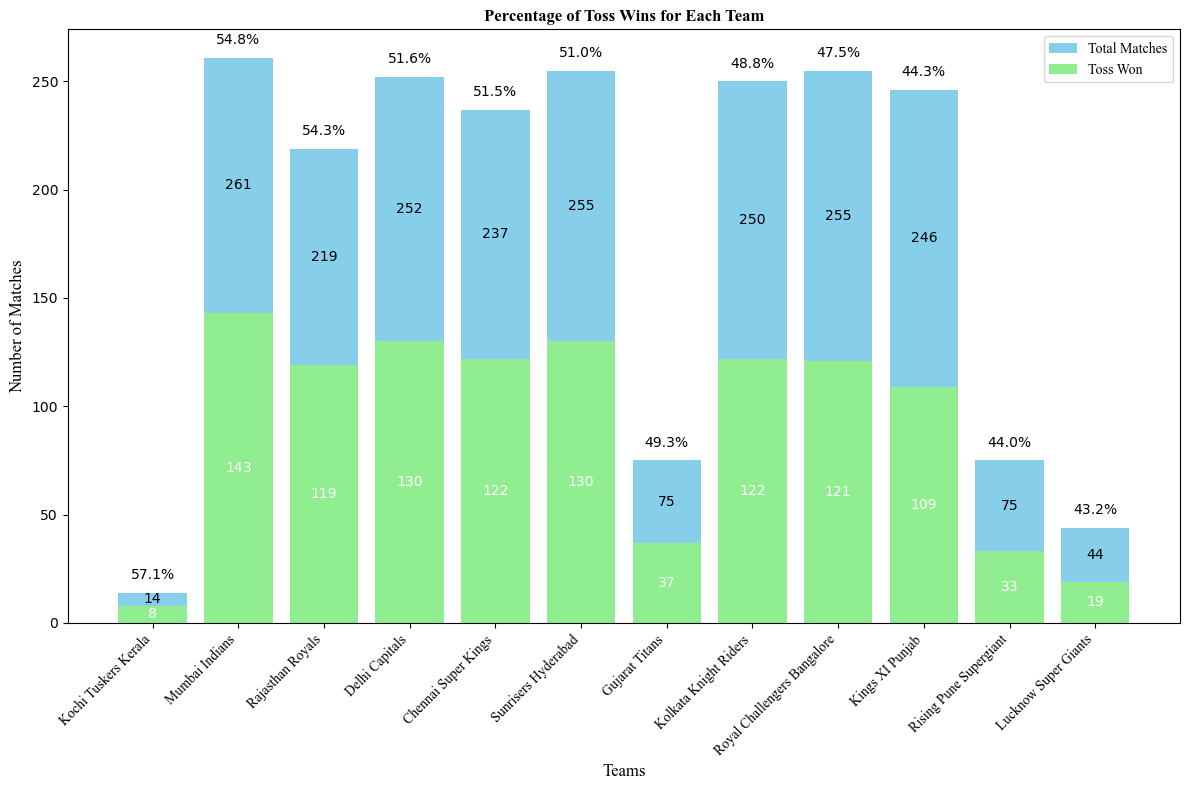

In [826]:
fig, ax = plt.subplots(figsize=(12, 8))
font = {'family': 'Times New Roman', 'size': 12}

ax.bar(teams, total_matches, label='Total Matches', color='skyblue')
ax.bar(teams, matches_won, label='Toss Won', color='lightgreen')

plt.title('Percentage of Toss Wins for Each Team', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Teams', fontdict=font)
plt.ylabel('Number of Matches', fontdict=font)
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')
plt.legend( loc='upper right', fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})

for i in range(len(teams)):
    ax.text(i, matches_won[i] / 2, f'{matches_won[i]}', ha='center', va='center', color='white', fontsize=10)
    ax.text(i, total_matches[i] - (total_matches[i] - matches_won[i]) / 2, f'{total_matches[i]}', ha='center', va='center', color='black', fontsize=10)
    ax.text(i, total_matches[i] + 5, f'{win_percentage[i]:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('toss_win_percentage_for_each_team.png')
plt.show()

In [879]:
venue_counts = df.groupby('venue')['id'].nunique()
len(venue_counts)

58

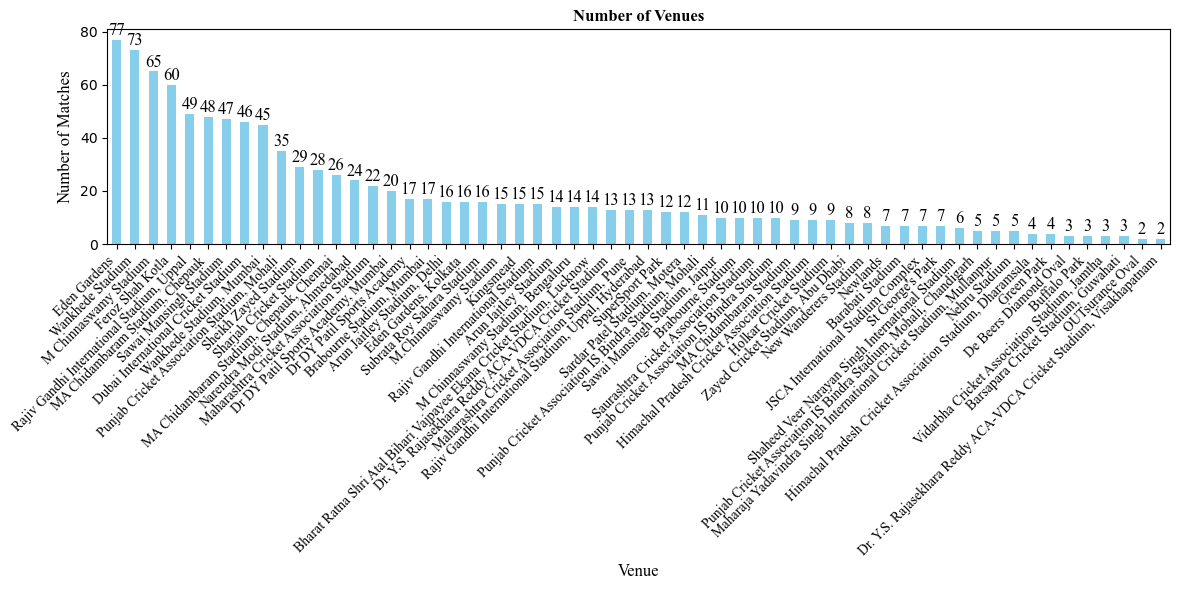

In [835]:
venue_counts_sorted = venue_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = venue_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Venues', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Venue', fontdict=font)
plt.ylabel('Number of Matches', fontdict=font)
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.3, 
             round(bar.get_height(), 2), 
             ha='center', 
             va='bottom',
             fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig('number_of_venue.png')
plt.show()

In [836]:
player_of_match_counts = df.groupby('player_of_match')['id'].nunique()
player_of_match_counts

player_of_match
A Chandila       1
A Kumble         3
A Manohar        1
A Mishra        12
A Nehra          6
                ..
YK Pathan       16
YS Chahal        6
Yash Thakur      1
Yuvraj Singh     5
Z Khan           1
Name: id, Length: 290, dtype: int64

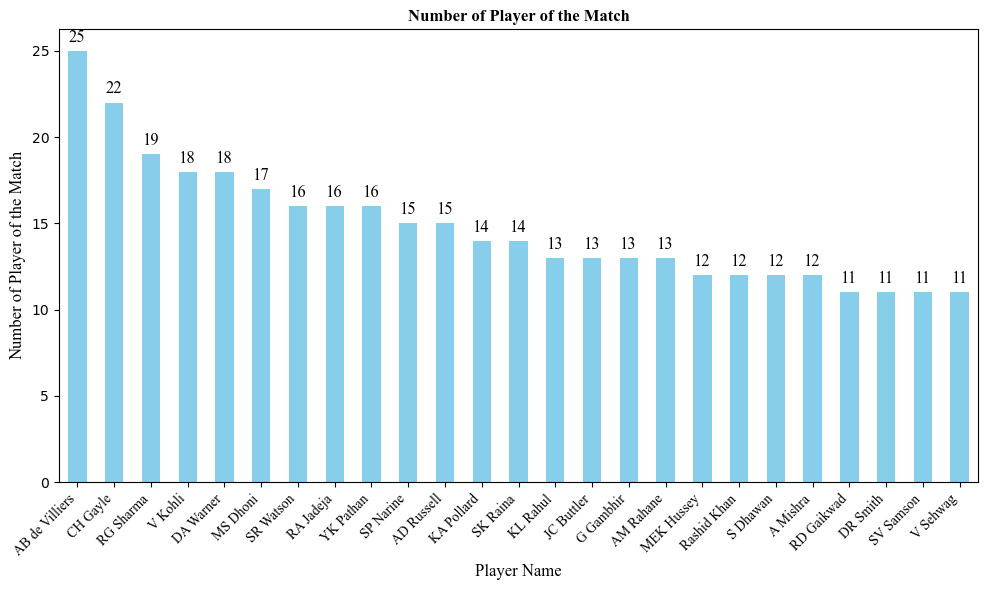

In [837]:
filtered_counts = player_of_match_counts[player_of_match_counts > 10]
player_of_match_counts_sorted = filtered_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = player_of_match_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Player of the Match', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Player Name', fontdict=font)
plt.ylabel('Number of Player of the Match', fontdict=font)
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.3, 
             round(bar.get_height(), 2), 
             ha='center', 
             va='bottom',
             fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig('player_of_the_match.png')
plt.show()

In [838]:
toss_decision_counts = df.groupby(['toss_winner','toss_decision'])['id'].nunique()
toss_decision_counts

toss_winner                  toss_decision
Chennai Super Kings          bat              59
                             field            63
Delhi Capitals               bat              41
                             field            89
Gujarat Titans               bat               7
                             field            30
Kings XI Punjab              bat              32
                             field            77
Kochi Tuskers Kerala         bat               3
                             field             5
Kolkata Knight Riders        bat              38
                             field            84
Lucknow Super Giants         bat               6
                             field            13
Mumbai Indians               bat              53
                             field            90
Rajasthan Royals             bat              44
                             field            75
Rising Pune Supergiant       bat              14
                          

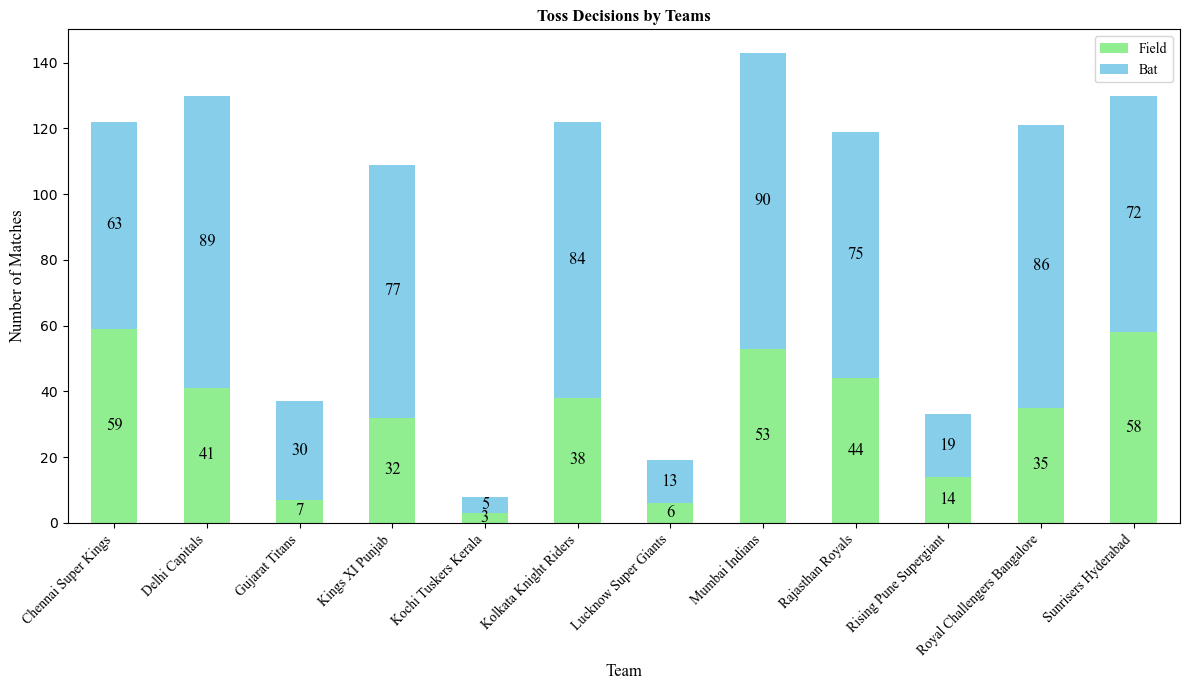

In [839]:
toss_decision_counts = df.groupby(['toss_winner', 'toss_decision'])['id'].nunique().unstack(fill_value=0)
font = {'family': 'Times New Roman', 'size': 12}

ax = toss_decision_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightgreen','skyblue'])

plt.title('Toss Decisions by Teams', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Team', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Number of Matches', fontdict={'family': 'Times New Roman', 'size': 12})
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')
plt.legend(labels=['Field', 'Bat'], loc='upper right', fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})

# Adding value labels inside each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=12, fontname='Times New Roman', color='black')

plt.tight_layout()

# Save as PNG file
plt.savefig('toss_decisions_by_teams.png')

plt.show()

In [840]:
unique_df_1 = df.drop_duplicates(subset='id')
same_values = unique_df_1['toss_winner'] == unique_df_1['outcome_winner']
diff_values = unique_df_1['toss_winner'] != unique_df_1['outcome_winner']
same_count = same_values.sum()
diff_count = diff_values.sum()

print(f"Totoal match won by the team if they won the toss {same_count}\nTotoal match won by the team if they loss the toss {diff_count}")

Totoal match won by the team if they won the toss 548
Totoal match won by the team if they loss the toss 545


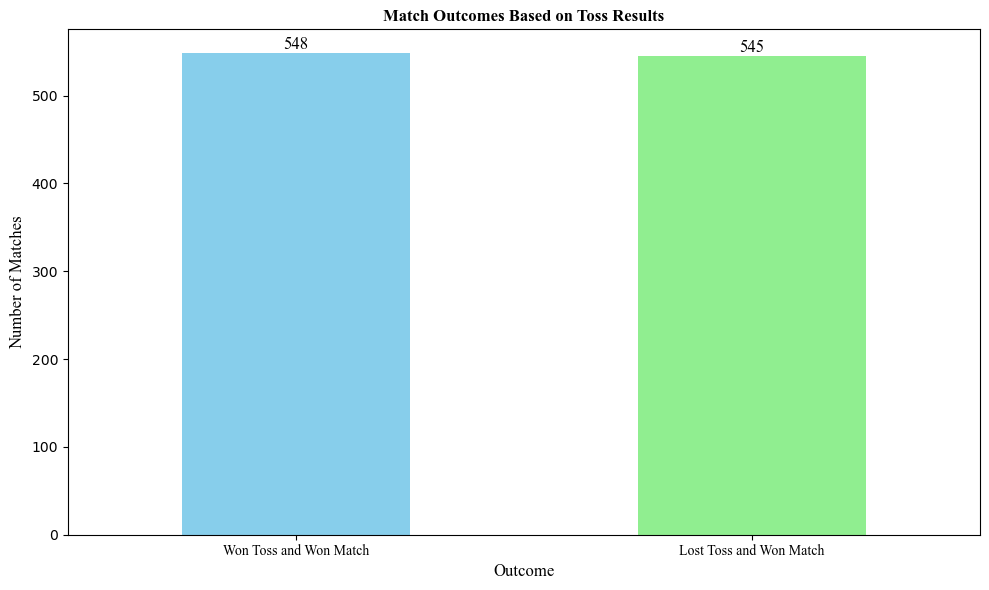

In [841]:

results = pd.Series({'Won Toss and Won Match': same_count, 'Lost Toss and Won Match': diff_count})
font = {'family': 'Times New Roman', 'size': 12}

plt.figure(figsize=(10, 6))
bars = results.plot(kind='bar', color=['skyblue', 'lightgreen'])

plt.title('Match Outcomes Based on Toss Results', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Outcome', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Number of Matches', fontdict={'family': 'Times New Roman', 'size': 12})
plt.xticks(rotation=0, fontname='Times New Roman')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.3, 
             round(bar.get_height(), 2), 
             ha='center', 
             va='bottom',
             fontname='Times New Roman', fontsize=12, color='black')

plt.tight_layout()
plt.savefig('match_outcomes_based_on_toss.png')

plt.show()


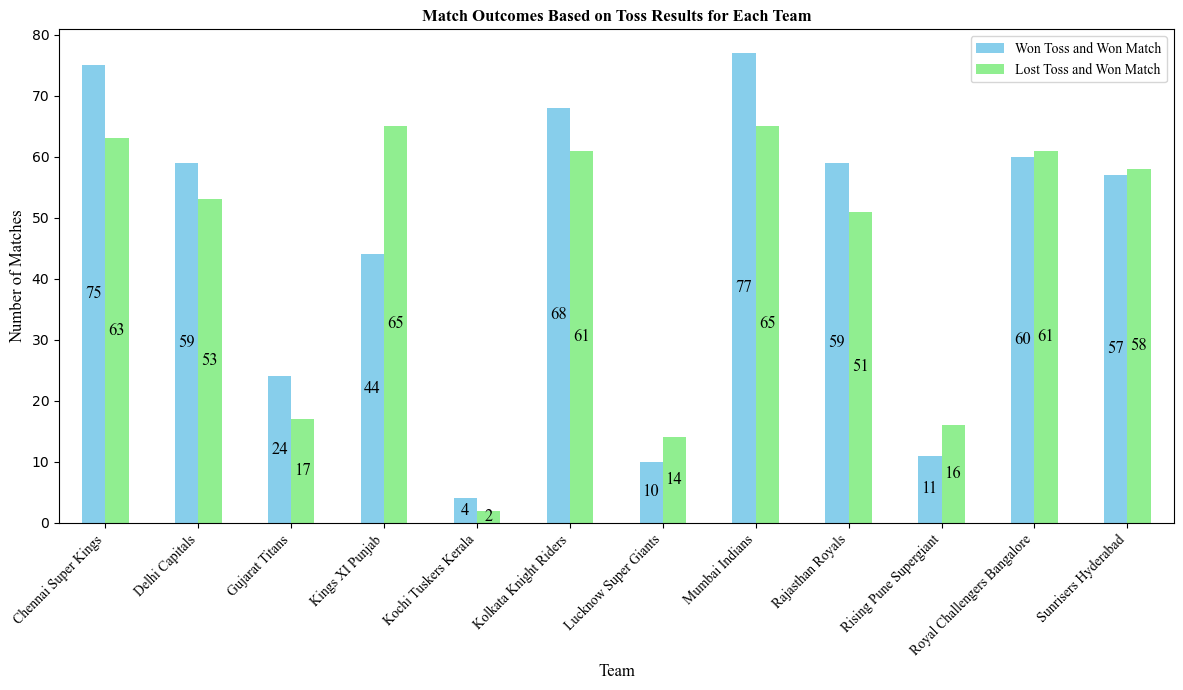

In [843]:
unique_df = df.drop_duplicates(subset='id')
won_toss_and_won_match = unique_df[unique_df['toss_winner'] == unique_df['outcome_winner']].groupby('toss_winner').size()

lost_toss_and_won_match = unique_df[unique_df['toss_winner'] != unique_df['outcome_winner']].groupby('outcome_winner').size()

results = pd.DataFrame({
    'Won Toss and Won Match': won_toss_and_won_match,
    'Lost Toss and Won Match': lost_toss_and_won_match
}).fillna(0)

font = {'family': 'Times New Roman', 'size': 12}

ax = results.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'lightgreen'])

plt.title('Match Outcomes Based on Toss Results for Each Team', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Team', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Number of Matches', fontdict={'family': 'Times New Roman', 'size': 12})
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')
plt.legend( loc='upper right', fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=12, fontname='Times New Roman', color='black')

plt.tight_layout()

plt.savefig('match_outcomes_based_on_toss_by_team.png')

plt.show()


#### Intermediate Data Analysis

In [844]:
df.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball'],
      dtype='object')

In [845]:
df.shape

(260268, 26)

#### 2024 season analysis

In [613]:
df_2024 = df[df['season'] == '2024']

In [614]:
df_2024.head()

,id,created,city,dates,outcome_winner,outcome_by_runs,outcome_by_wickets,player_of_match,team_1,team_2,...,ball_number,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind,actual_ball
0,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,1,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.1
1,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,2,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.2
2,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,3,TM Head,K Rabada,Abhishek Sharma,4,0,4,None,None,0.3
3,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,4,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.4
4,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,5,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.5


In [615]:
df_2024.shape

(16451, 26)

In [616]:
match_count = df_2024['id'].nunique()
match_count

69

In [617]:
df_2024.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball'],
      dtype='object')

In [618]:
df_2024_sorted = df_2024.sort_values(by='dates', ascending=False)
df_2024_sorted.head()

,id,created,city,dates,outcome_winner,outcome_by_runs,outcome_by_wickets,player_of_match,team_1,team_2,...,ball_number,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind,actual_ball
216552,1426310.json,2024-05-22,Ahmedabad,2024-05-22,Rajasthan Royals,NaN,4.0,R Ashwin,Royal Challengers Bangalore,Rajasthan Royals,...,4,MK Lomror,Avesh Khan,Swapnil Singh,4,0,4,None,None,18.4
216580,1426310.json,2024-05-22,Ahmedabad,2024-05-22,Rajasthan Royals,NaN,4.0,R Ashwin,Royal Challengers Bangalore,Rajasthan Royals,...,2,T Kohler-Cadmore,Mohammed Siraj,YBK Jaiswal,4,0,4,None,None,3.2
216612,1426310.json,2024-05-22,Ahmedabad,2024-05-22,Rajasthan Royals,NaN,4.0,R Ashwin,Royal Challengers Bangalore,Rajasthan Royals,...,4,SV Samson,KV Sharma,YBK Jaiswal,1,0,1,None,None,8.4
216613,1426310.json,2024-05-22,Ahmedabad,2024-05-22,Rajasthan Royals,NaN,4.0,R Ashwin,Royal Challengers Bangalore,Rajasthan Royals,...,5,YBK Jaiswal,KV Sharma,SV Samson,1,0,1,None,None,8.5
216614,1426310.json,2024-05-22,Ahmedabad,2024-05-22,Rajasthan Royals,NaN,4.0,R Ashwin,Royal Challengers Bangalore,Rajasthan Royals,...,6,SV Samson,KV Sharma,YBK Jaiswal,1,0,1,None,None,8.6


In [619]:
match_df = df_2024[df_2024['id']=='1426310.json']
match_df.shape

(241, 26)

In [620]:
winner = match_df['outcome_winner'].tolist()[0]
winner

'Rajasthan Royals'

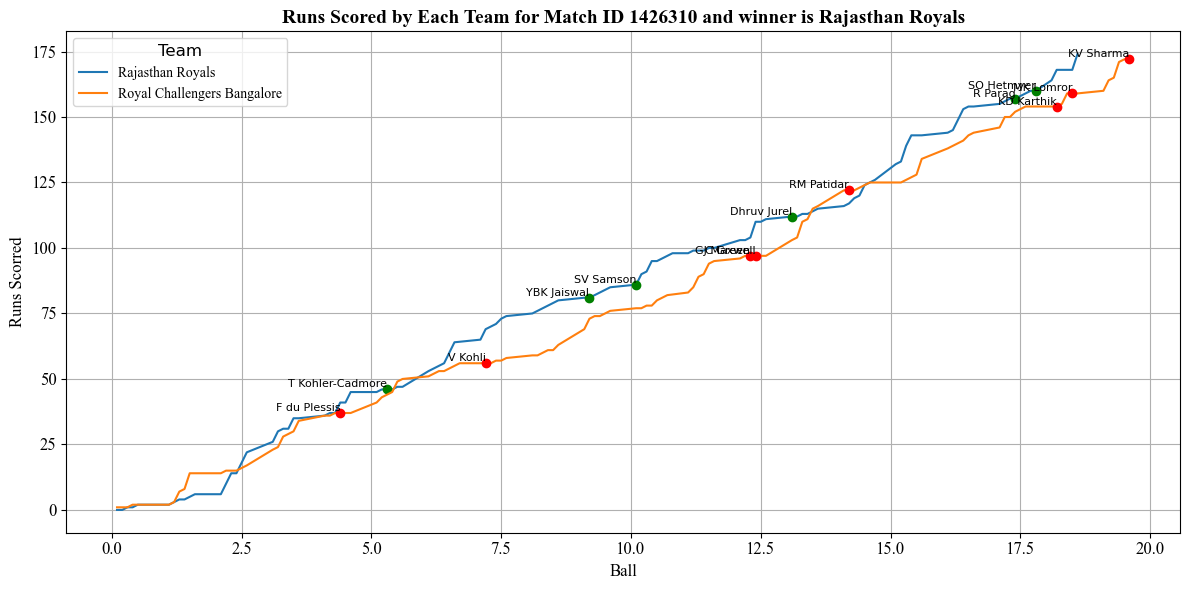

In [621]:
fig, ax = plt.subplots(figsize=(12, 6))

team_a_data = match_df[match_df['team_betting'] == 'Rajasthan Royals']
team_a_data['cumulative_runs'] = team_a_data['runs_total'].cumsum()

line_a, = ax.plot(team_a_data['actual_ball'], team_a_data['cumulative_runs'], label='Rajasthan Royals')

for index, row in team_a_data.iterrows():
    if row['wickets_player_out']:
        ax.plot(row['actual_ball'], row['cumulative_runs'], 'go')
        ax.text(row['actual_ball'], row['cumulative_runs'], row['wickets_player_out'], ha='right', va='bottom', fontsize=8)

team_b_data = match_df[match_df['team_betting'] == 'Royal Challengers Bangalore']
team_b_data['cumulative_runs'] = team_b_data['runs_total'].cumsum()

line_b, = ax.plot(team_b_data['actual_ball'], team_b_data['cumulative_runs'], label='Royal Challengers Bangalore')

for index, row in team_b_data.iterrows():
    if row['wickets_player_out']:
        ax.plot(row['actual_ball'], row['cumulative_runs'], 'ro')
        ax.text(row['actual_ball'], row['cumulative_runs'], row['wickets_player_out'], ha='right', va='bottom', fontsize=8)

ax.set_title('Runs Scored by Each Team for Match ID 1426310 and winner is ' + winner, fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
ax.set_xlabel('Ball', fontdict={'family': 'Times New Roman', 'size': 12})
ax.set_ylabel('Runs Scorred', fontdict={'family': 'Times New Roman', 'size': 12})
ax.legend(title='Team', loc='upper left', fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig('runs_scored_by_each_team.png')

plt.show()

In [622]:
# df_rcb = df_2024[df_2024['team_betting'] == 'Royal Challengers Bangalore']
# df_rcb.head()

In [623]:
# df_rcb.shape

In [856]:
average_total_runs = df.groupby(['team_betting','actual_ball'])['runs_total'].mean().reset_index()
average_total_runs.head()

,team_betting,actual_ball,runs_total
0,Chennai Super Kings,0.1,0.760504
1,Chennai Super Kings,0.2,0.672269
2,Chennai Super Kings,0.3,0.928571
3,Chennai Super Kings,0.4,0.920168
4,Chennai Super Kings,0.5,0.823529


In [869]:
average_total_runs['cumulative_runs'] = average_total_runs.groupby('team_betting')['runs_total'].cumsum()
average_total_runs.sort_values(by='cumulative_runs', ascending=False)

,team_betting,actual_ball,runs_total,cumulative_runs
1024,Kolkata Knight Riders,19.8,2.875000,250.560992
1025,Kolkata Knight Riders,19.9,0.000000,250.560992
694,Kings XI Punjab,19.9,6.000000,249.441312
1881,Royal Challengers Bangalore,19.9,0.333333,248.141114
1880,Royal Challengers Bangalore,19.8,1.285714,247.807781
...,...,...,...,...
0,Chennai Super Kings,0.1,0.760504,0.760504
1703,Royal Challengers Bangalore,0.1,0.689922,0.689922
1026,Lucknow Super Giants,0.1,0.681818,0.681818
1543,Rising Pune Supergiant,0.1,0.453333,0.453333


In [870]:
teams = average_total_runs['team_betting'].unique()
teams

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders',
       'Lucknow Super Giants', 'Mumbai Indians', 'Rajasthan Royals',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

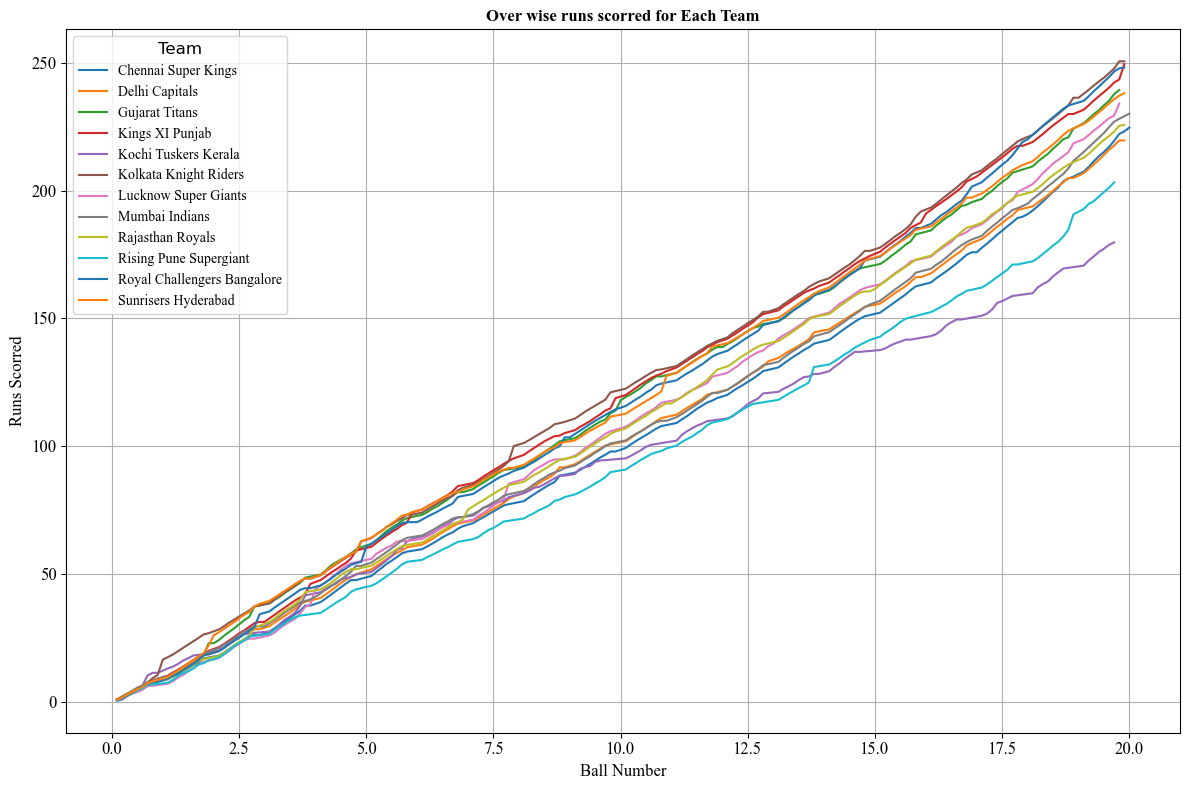

In [871]:
fig, ax = plt.subplots(figsize=(12, 8))

for team in teams:
    team_data = average_total_runs[average_total_runs['team_betting'] == team]
    ax.plot(team_data['actual_ball'], team_data['cumulative_runs'], label=team)

ax.set_title('Over wise runs scorred for Each Team', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
ax.set_xlabel('Ball Number', fontdict={'family': 'Times New Roman', 'size': 12})
ax.set_ylabel('Runs Scorred', fontdict={'family': 'Times New Roman', 'size': 12})
ax.legend(title='Team', loc='upper left', fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig('over_wise_runs_scored_by_each_team.png')

plt.show()

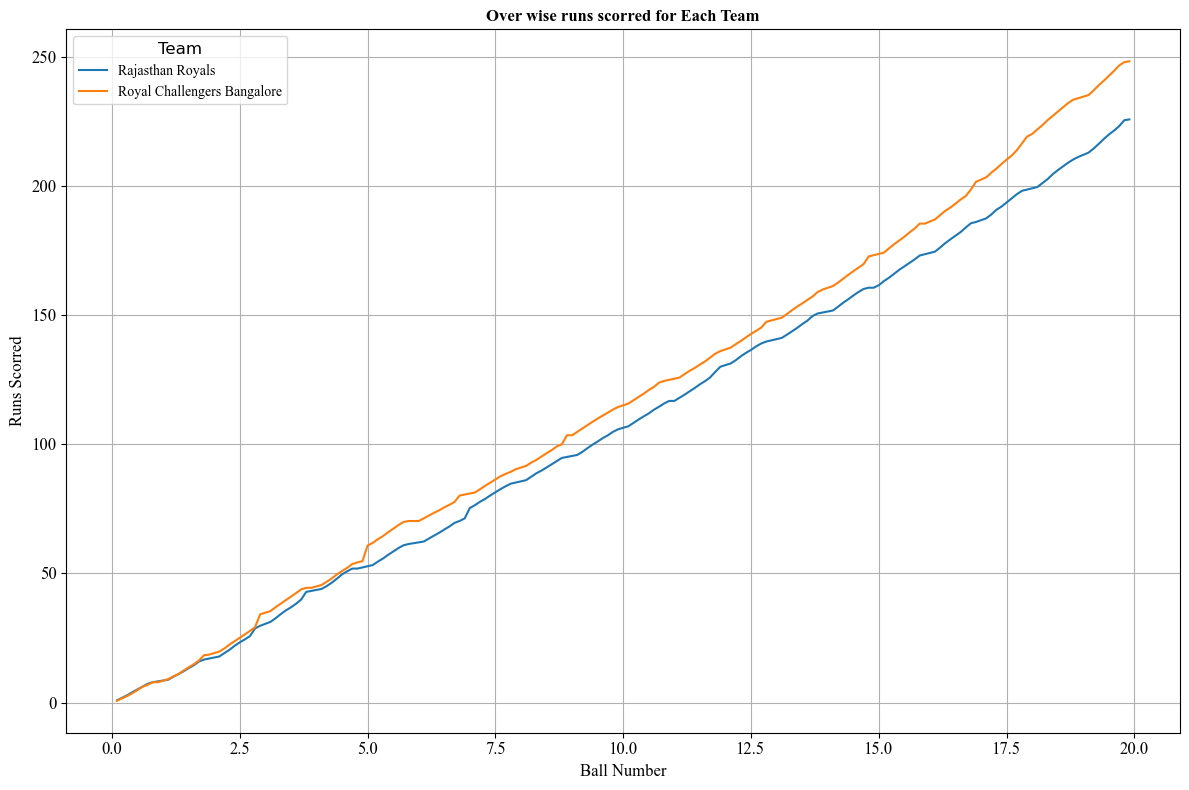

In [854]:
fig, ax = plt.subplots(figsize=(12, 8))
teams = ['Rajasthan Royals','Royal Challengers Bangalore']
for team in teams:
    team_data = average_total_runs[average_total_runs['team_betting'] == team]
    ax.plot(team_data['actual_ball'], team_data['cumulative_runs'], label=team)

ax.set_title('Over wise runs scorred for Each Team', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
ax.set_xlabel('Ball Number', fontdict={'family': 'Times New Roman', 'size': 12})
ax.set_ylabel('Runs Scorred', fontdict={'family': 'Times New Roman', 'size': 12})
ax.legend(title='Team', loc='upper left', fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig('team_wise_average_runs_scored_by.png')

plt.show()

In [628]:
df_2024.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball'],
      dtype='object')

In [872]:
current_df = df
current_df['over_number'] += 1
team_over_runs = df_2024.groupby(['id', 'team_betting', 'over_number'])['runs_total'].sum().reset_index()
team_over_runs.head()

,id,team_betting,over_number,runs_total
0,1422119.json,Chennai Super Kings,1,8
1,1422119.json,Chennai Super Kings,2,5
2,1422119.json,Chennai Super Kings,3,15
3,1422119.json,Chennai Super Kings,4,10
4,1422119.json,Chennai Super Kings,5,11


In [873]:
average_runs_over = team_over_runs.groupby(['over_number', 'team_betting'])['runs_total'].mean().reset_index()
average_runs_over.head()


,over_number,team_betting,runs_total
0,1,Chennai Super Kings,5.000000
1,1,Delhi Capitals,9.928571
2,1,Gujarat Titans,7.083333
3,1,Kings XI Punjab,7.714286
4,1,Kolkata Knight Riders,10.384615


In [874]:
pivot_table = average_runs_over.pivot(index='over_number', columns='team_betting', values='runs_total')
pivot_table

team_betting,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kings XI Punjab,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
over_number,,,,,,,,,,
1,5.000000,9.928571,7.083333,7.714286,10.384615,6.071429,6.285714,6.428571,8.266667,8.285714
2,7.142857,9.714286,8.666667,7.857143,9.923077,7.214286,10.857143,6.000000,11.866667,12.928571
3,9.214286,12.000000,9.000000,10.000000,12.923077,8.071429,10.785714,9.571429,10.533333,13.000000
4,8.857143,9.000000,7.500000,8.214286,12.384615,10.230769,8.307692,11.500000,10.933333,9.214286
5,10.928571,13.714286,6.583333,9.000000,10.307692,8.461538,9.538462,9.500000,6.666667,14.000000
6,11.214286,9.714286,7.500000,10.285714,10.076923,9.076923,10.615385,8.571429,10.133333,11.500000
7,7.928571,9.214286,7.333333,7.142857,7.076923,7.076923,8.230769,6.357143,7.800000,9.071429
8,7.571429,9.214286,7.250000,9.000000,10.384615,8.307692,6.923077,7.285714,8.800000,8.785714
9,8.285714,8.714286,9.000000,9.285714,9.923077,8.923077,9.307692,8.500000,9.533333,11.071429


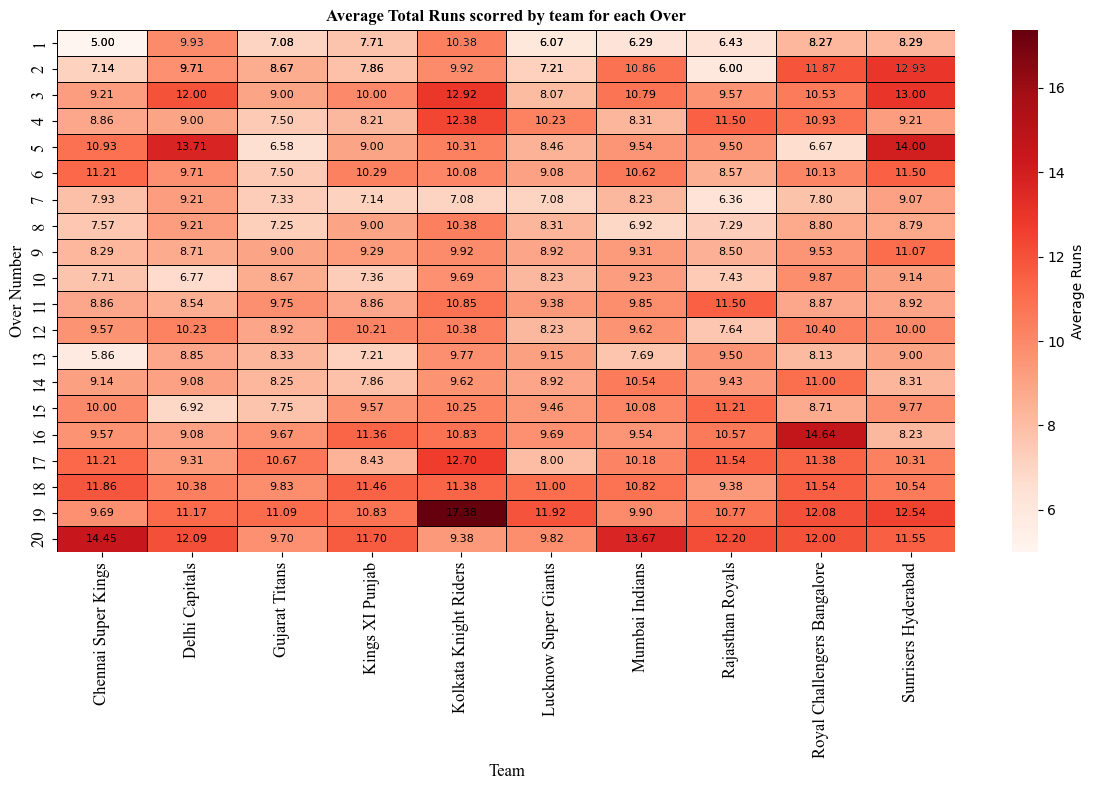

In [878]:
import seaborn as sns

plt.figure(figsize=(12, 8))  # Adjust the figure size to better fit annotations
heatmap = sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt=".2f", linewidths=.5, linecolor='black', cbar_kws={'label': 'Average Runs'}, annot_kws={"size": 8})

for i in range(pivot_table.shape[0]):
    for j in range(pivot_table.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{pivot_table.iat[i, j]:.2f}', ha='center', va='center', fontsize=8, color='black')

plt.title('Average Total Runs scorred by team for each Over', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Team', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Over Number', fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.tight_layout()

plt.savefig('average_run_scorred_each_over.png')

plt.show()

#### Time Series Analysis

In [893]:
data = df
data.shape

(260268, 26)

In [894]:
data.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball'],
      dtype='object')

In [895]:
data.head()

,id,created,city,dates,outcome_winner,outcome_by_runs,outcome_by_wickets,player_of_match,team_1,team_2,...,ball_number,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind,actual_ball
0,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,1,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.1
1,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,2,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.2
2,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,3,TM Head,K Rabada,Abhishek Sharma,4,0,4,None,None,0.3
3,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,4,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.4
4,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,5,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.5


In [896]:
# data['season'] = data['season'].astype(str)

In [897]:
total_runs_per_match = data.groupby(['id', 'season', 'team_betting'])['runs_total'].sum().reset_index()
total_runs_per_match.head()

,id,season,team_betting,runs_total
0,1082591.json,2017,Royal Challengers Bangalore,172
1,1082591.json,2017,Sunrisers Hyderabad,207
2,1082592.json,2017,Mumbai Indians,184
3,1082592.json,2017,Rising Pune Supergiant,187
4,1082593.json,2017,Gujarat Titans,183


In [898]:
average_runs_per_season = total_runs_per_match.groupby(['season', 'team_betting'])['runs_total'].mean().reset_index()
average_runs_per_season.head()

,season,team_betting,runs_total
0,2007/08,Chennai Super Kings,157.500000
1,2007/08,Delhi Capitals,151.285714
2,2007/08,Kings XI Punjab,164.266667
3,2007/08,Kolkata Knight Riders,149.384615
4,2007/08,Mumbai Indians,148.571429


In [903]:
average_runs_per_season['season'] = pd.Categorical(average_runs_per_season['season'], ordered=True)
average_runs_per_season = average_runs_per_season.sort_values('season')

In [904]:
pivot_table = average_runs_per_season.pivot(index='season', columns='team_betting', values='runs_total')
# pivot_table.fillna(0,inplace=True)
pivot_table = pivot_table[pivot_table.apply(lambda x: x != None).any(axis=1)]
pivot_table

team_betting,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,
2007/08,157.500000,151.285714,NaN,164.266667,NaN,149.384615,NaN,148.571429,162.562500,NaN,141.642857,159.214286
2009,159.357143,142.066667,NaN,137.714286,NaN,136.307692,NaN,145.923077,131.230769,NaN,142.500000,150.500000
2009/10,162.750000,153.928571,NaN,163.428571,NaN,153.142857,NaN,171.125000,155.642857,NaN,150.062500,148.375000
2011,160.000000,149.071429,NaN,158.857143,135.785714,134.866667,NaN,143.000000,129.769231,136.538462,154.312500,152.857143
2012,157.277778,146.944444,NaN,149.375000,NaN,147.294118,NaN,144.823529,157.250000,145.062500,164.800000,154.133333
2013,154.333333,140.312500,NaN,151.750000,NaN,143.125000,NaN,156.578947,150.277778,141.375000,162.562500,136.352941
2014,165.625000,148.642857,NaN,175.705882,NaN,156.187500,NaN,156.866667,154.714286,NaN,149.500000,150.142857
2015,160.294118,154.857143,NaN,144.142857,NaN,157.230769,NaN,170.875000,164.846154,NaN,144.437500,157.857143
2016,NaN,150.285714,153.125000,152.428571,NaN,150.866667,NaN,156.714286,NaN,147.357143,186.312500,157.235294


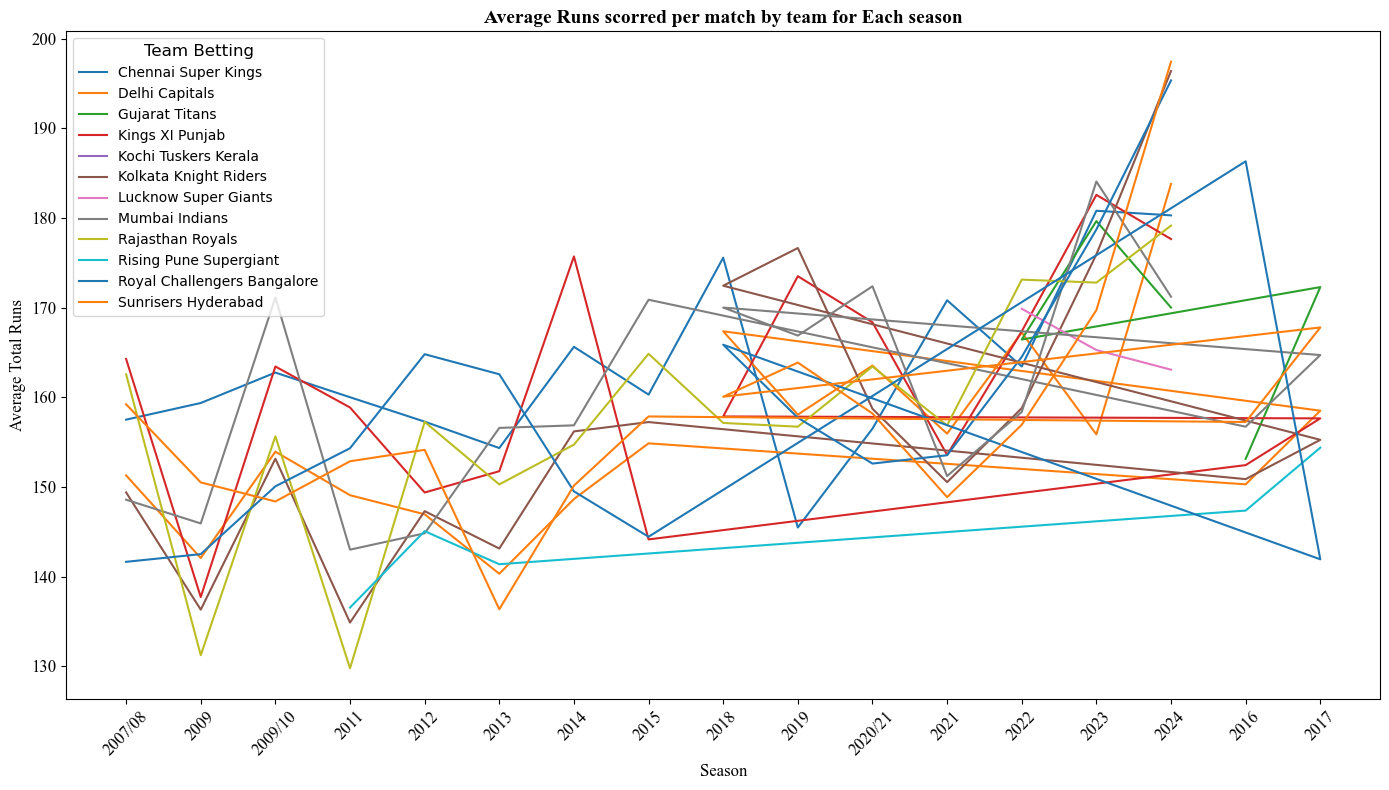

In [905]:
teams_with_runs = pivot_table.columns[pivot_table.sum() != 0]

plt.figure(figsize=(14, 8))
for team in teams_with_runs:
    team_data = pivot_table[team].dropna()
    plt.plot(team_data.index, team_data.values, label=team)

plt.title('Average Runs scorred per match by team for Each season', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Season', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Average Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12, rotation=45)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.legend(title='Team Betting', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.savefig('time_series_average_run_per_match_per_season.png')
plt.show()

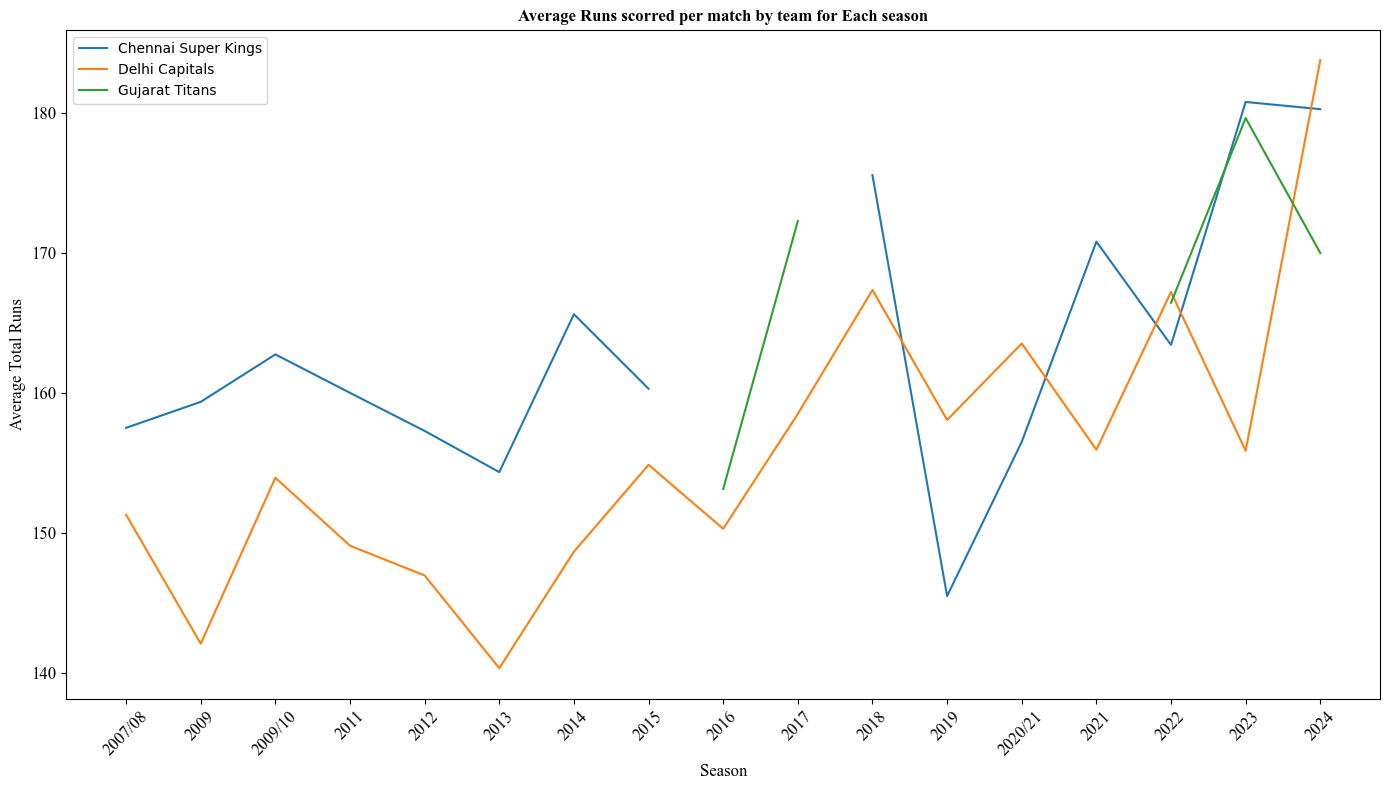

In [918]:
teams_with_runs = pivot_table.columns[pivot_table.sum() != 0]

plt.figure(figsize=(14, 8))
for team in teams_with_runs[:3]:
    team_data = pivot_table[team]
    plt.plot(team_data.index, team_data.values, label=team)

plt.title('Average Runs scorred per match by team for Each season', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Season', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Average Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12, rotation=45)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.legend(title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.savefig('time_series_average_run_per_match_per_season_2.png')
plt.show()

In [642]:
## Team wise time series analysis

In [ ]:
data

In [1002]:
team_name = "Royal Challengers Bangalore"

In [1003]:
df_team = data[data['team_betting'] == team_name]
df_team.shape

(30023, 26)

In [1004]:
total_runs_per_match = df_team.groupby(['id', 'season'])['runs_total'].sum().reset_index()
# total_runs_per_match['season'] = total_runs_per_match['season'].apply(lambda x: int(x.split("/")[0]))
total_runs_per_match = total_runs_per_match.sort_values(by='season', ascending=True)
total_runs_per_match['id'] = range(1, len(total_runs_per_match)+1)
total_runs_per_match.head()

,id,season,runs_total
127,1,2007/08,154
116,2,2007/08,82
117,3,2007/08,166
118,4,2007/08,135
119,5,2007/08,165


In [1005]:

pivot_table = total_runs_per_match.pivot(index='id', columns='season', values='runs_total')#.fillna(0)
pivot_table

season,2007/08,2009,2009/10,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020/21,2021,2022,2023,2024
id,,,,,,,,,,,,,,,,,
1,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0


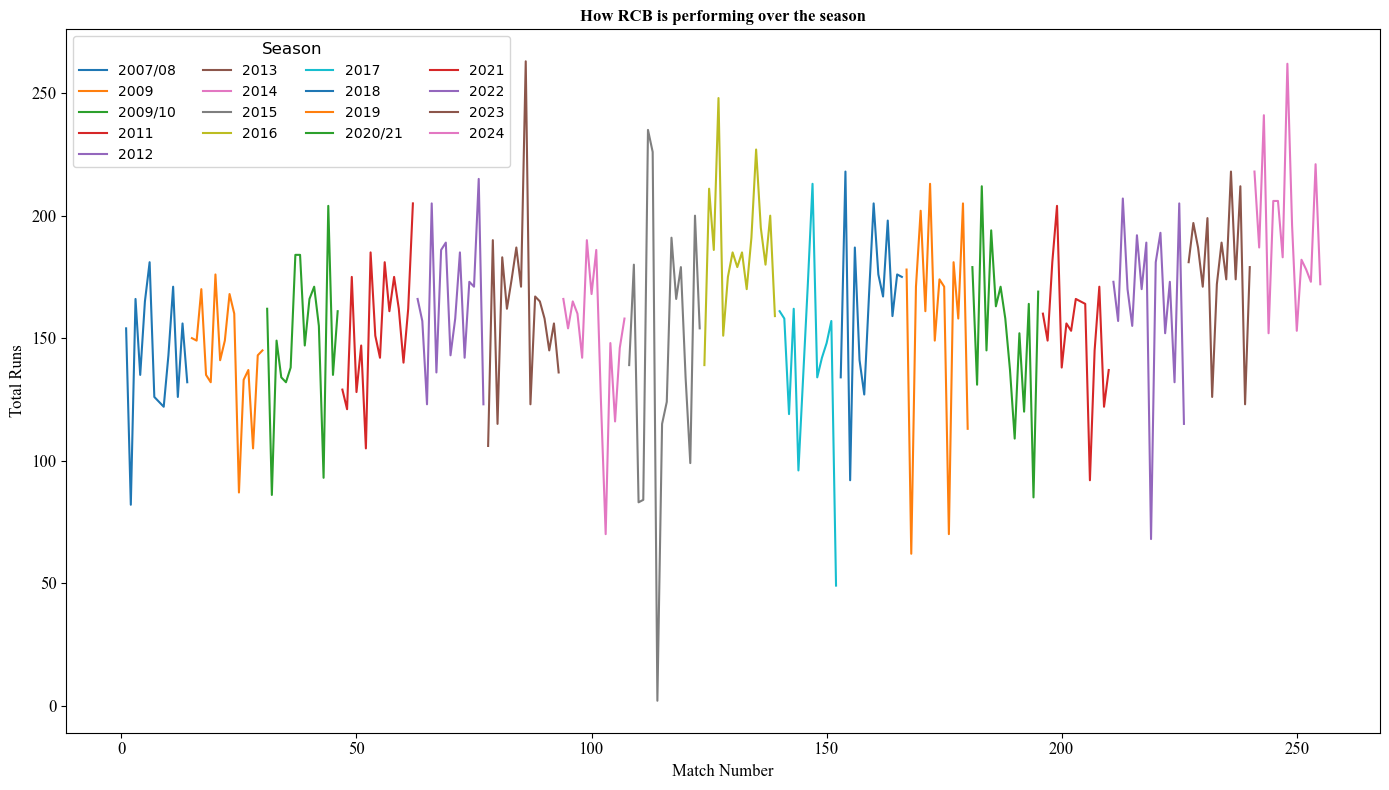

In [1006]:
plt.figure(figsize=(14, 8))
for season in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[season], label=season)

plt.title('How RCB is performing over the season', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Match Number', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Total Runs', rotation=90, fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.legend(title='Season', ncol=4, title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.savefig("time_series_analysis_rcb.png")
plt.show()

In [987]:
## Player Performance

In [994]:
player_name = "V Kohli"

In [996]:
df_player = data[data['batter'] == player_name]
df_player.shape

(6236, 26)

In [998]:
player_runs_per_match = df_player.groupby(['id', 'season'])['runs_total'].sum().reset_index()
player_runs_per_match = player_runs_per_match.sort_values(by='season', ascending=True)
player_runs_per_match['id'] = range(1, len(player_runs_per_match)+1)
player_runs_per_match.head()

,id,season,runs_total
121,1,2007/08,26
113,2,2007/08,5
114,3,2007/08,24
115,4,2007/08,15
117,5,2007/08,1


In [1000]:
player_pivot_table = player_runs_per_match.pivot(index='id', columns='season', values='runs_total')
# player_pivot_table

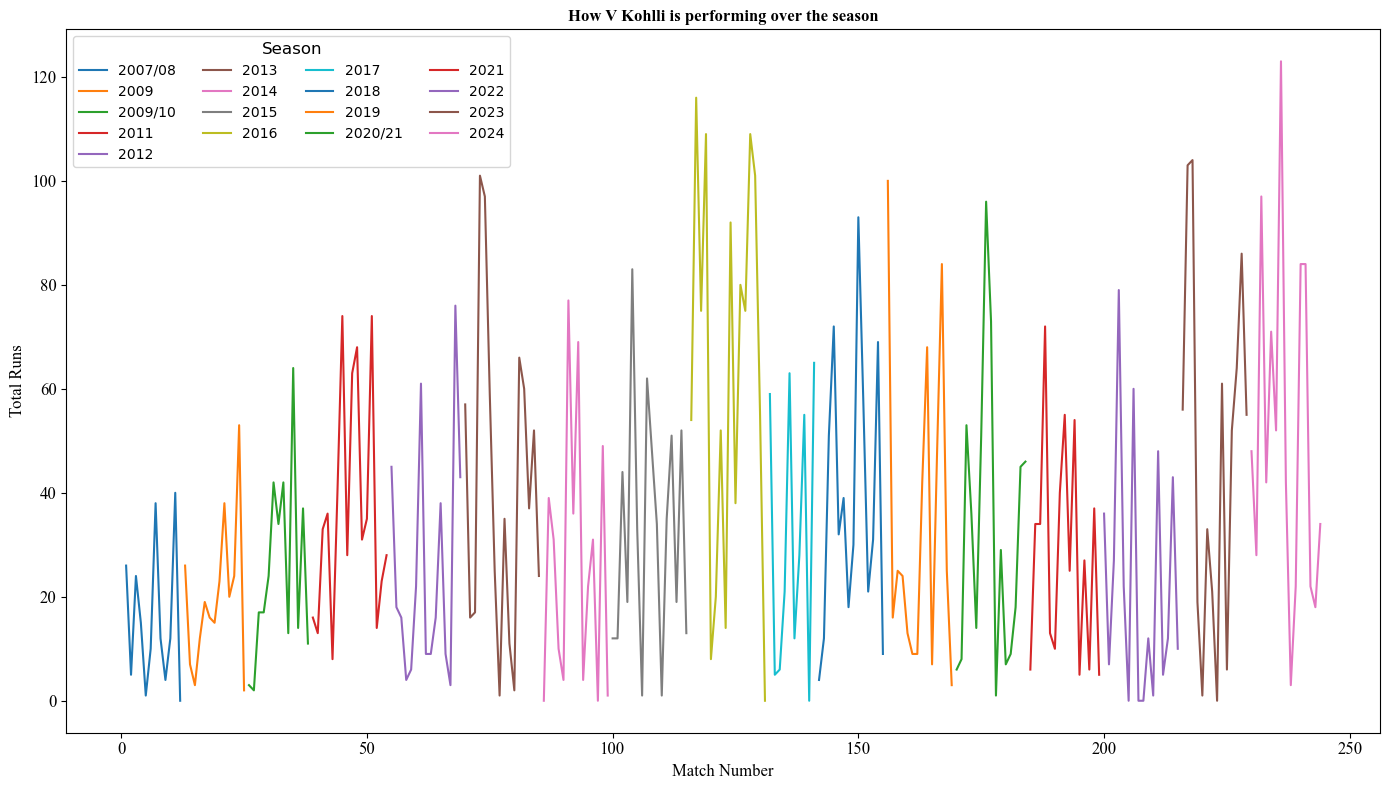

In [1001]:
plt.figure(figsize=(14, 8))
for season in player_pivot_table.columns:
    plt.plot(player_pivot_table.index, player_pivot_table[season], label=season)

plt.title('How V Kohlli is performing over the season', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Match Number', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Total Runs', rotation=90, fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.legend(title='Season', ncol=4, title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.savefig("time_series_analysis_kohli.png")
plt.show()

In [648]:
total_runs_per_match_season = total_runs_per_match[total_runs_per_match['season'].isin(['2024', '2023', '2022', '2021'])]
total_runs_per_match_season.shape

(60, 3)

In [649]:
pivot_table = total_runs_per_match_season.pivot(index='id', columns='season', values='runs_total')#.fillna(0)
# pivot_table

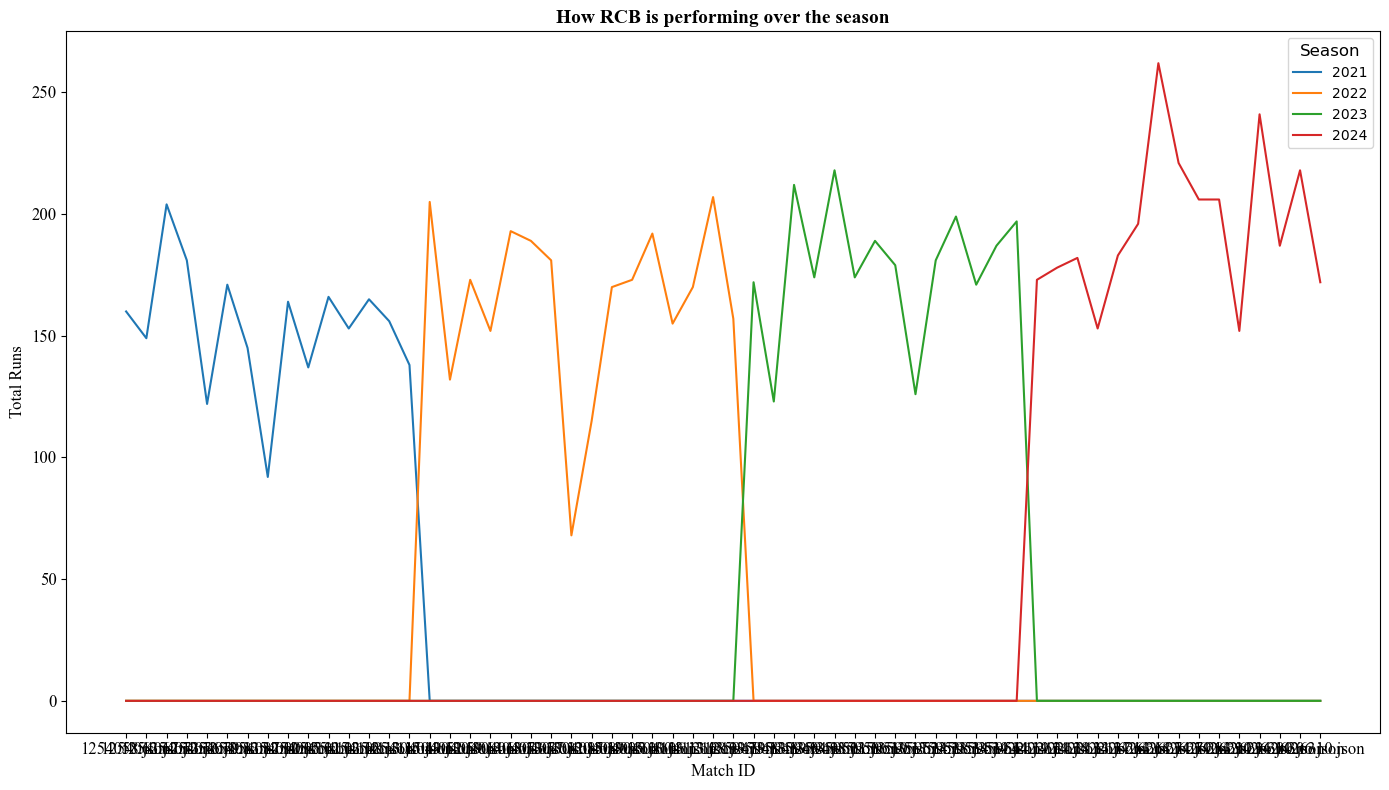

In [650]:
plt.figure(figsize=(14, 8))
for season in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[season], label=season)

plt.title('How RCB is performing over the Current Season', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Match ID', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.legend(title='Season', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.savefig("time_series_analysis_rcb_few_season.png")
plt.show()

In [651]:
df_team.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball'],
      dtype='object')

In [652]:
df_team.shape

(30023, 26)

In [653]:
df_team = df_team[df_team['season'].isin(['2024','2023','2022','2021'])]
df_team['dates'] = pd.to_datetime(df_team['dates'])
df_team = df_team.sort_values(by='dates')

In [654]:
daily_runs = df_team.groupby('dates')['runs_total'].sum().reset_index()
daily_runs.head()

,dates,runs_total
0,2021-04-09,160
1,2021-04-14,149
2,2021-04-18,204
3,2021-04-22,181
4,2021-04-25,122


In [655]:
daily_runs.shape

(60, 2)

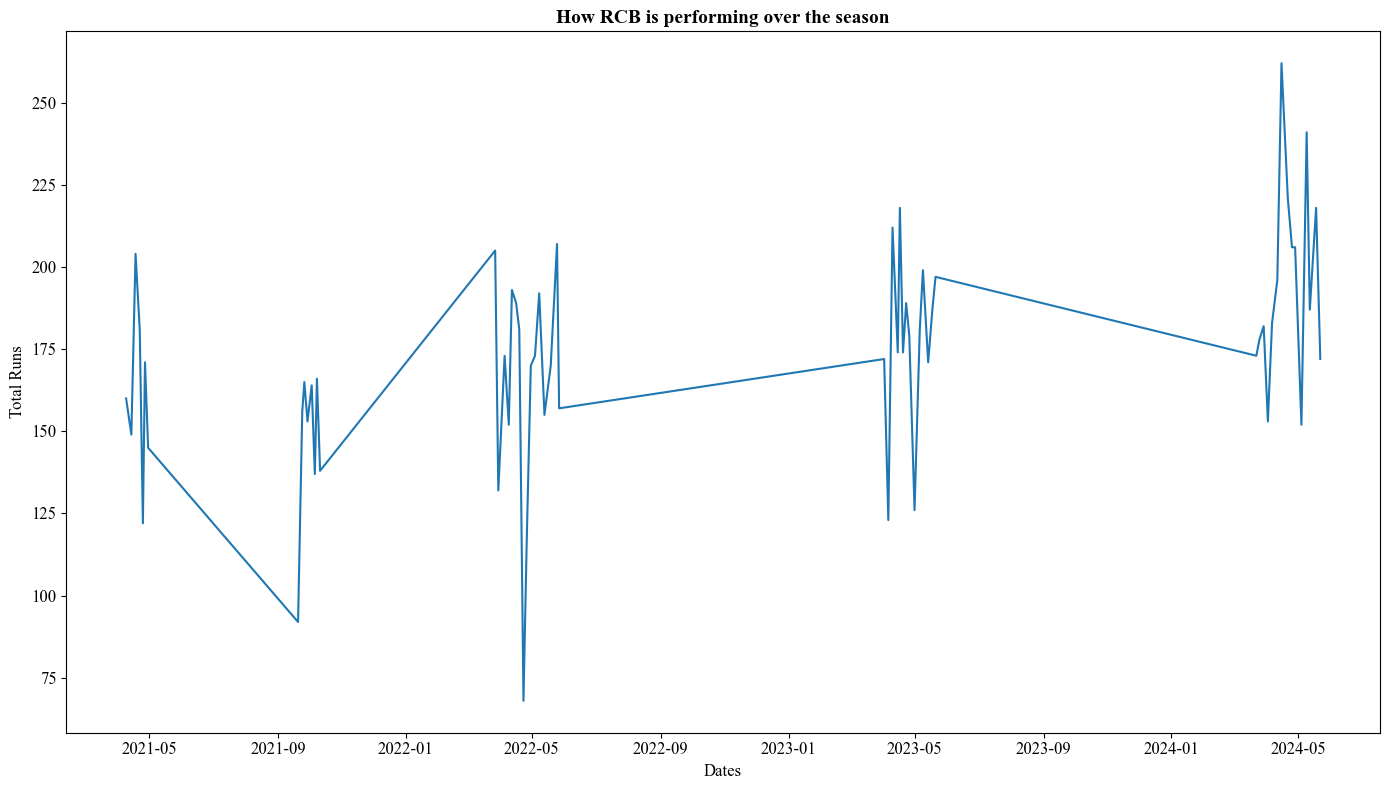

In [656]:
plt.figure(figsize=(14, 8))

plt.plot(daily_runs['dates'], daily_runs['runs_total'], linestyle='-')

plt.title('How RCB is performing over the season', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
plt.xlabel('Dates', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig("rcb_performance_over_the_year.png")
plt.show()

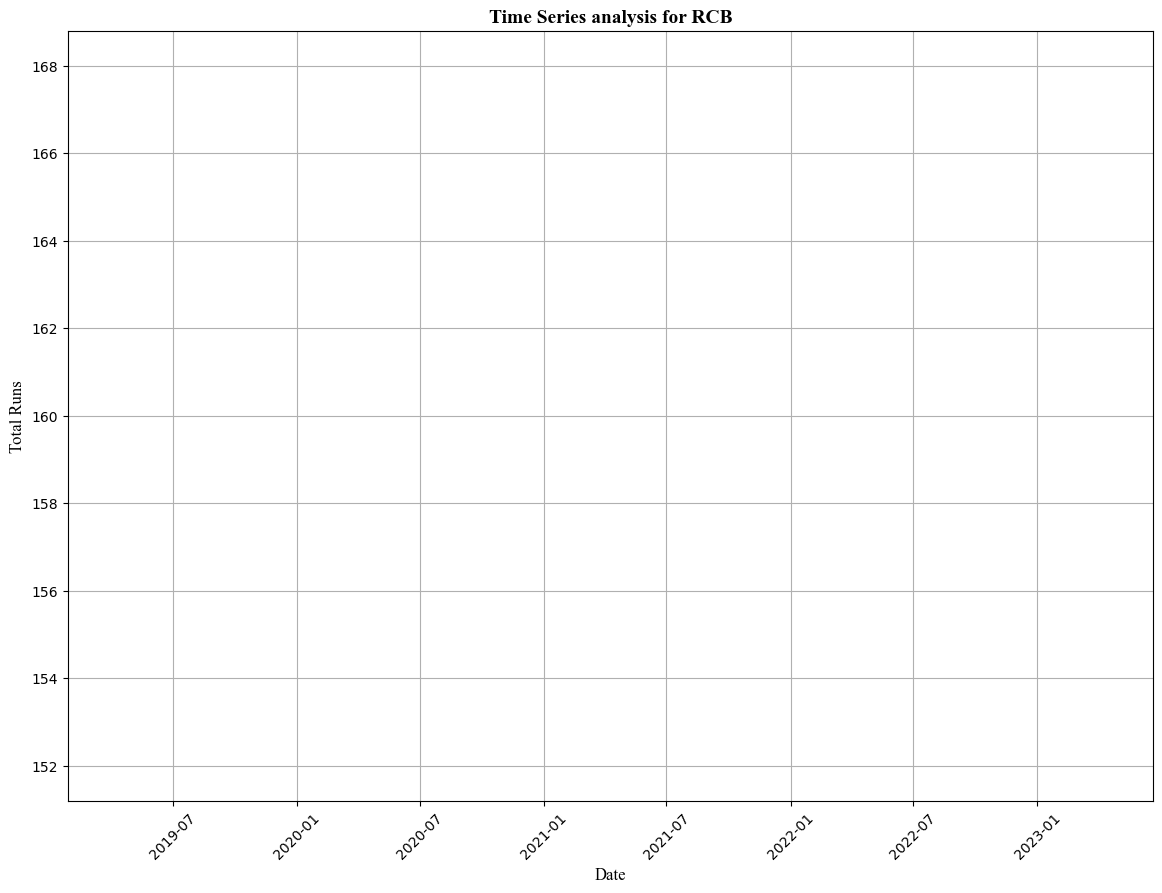

In [657]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(14, 10))

%matplotlib inline

def update(frame):
    ax.clear()
    current_data = daily_runs[daily_runs['dates'] <= frame]
    ax.plot(current_data['dates'], current_data['runs_total'], marker='', linestyle='-', color='b')
    ax.set_title('Time Series analysis for RCB', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
    ax.set_xlabel('Date', fontdict={'family': 'Times New Roman', 'size': 12})
    ax.set_ylabel('Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

ani = animation.FuncAnimation(fig, update, frames=pd.date_range(start=daily_runs['dates'].min(), end=daily_runs['dates'].max(), freq='D'), interval=200, repeat=False)

ani.save('animated_line_chart_rcb.html', writer='html')
HTML(open('animated_line_chart_rcb.html').read())

In [658]:
## Player stats

In [659]:
data.head()

,id,created,city,dates,outcome_winner,outcome_by_runs,outcome_by_wickets,player_of_match,team_1,team_2,...,ball_number,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind,actual_ball
0,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,1,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.1
1,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,2,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.2
2,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,3,TM Head,K Rabada,Abhishek Sharma,4,0,4,None,None,0.3
3,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,4,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.4
4,1426261.json,2024-04-09,Mohali,2024-04-09,Sunrisers Hyderabad,2.0,NaN,Nithish Kumar Reddy,Sunrisers Hyderabad,Kings XI Punjab,...,5,TM Head,K Rabada,Abhishek Sharma,0,0,0,None,None,0.5


In [660]:
data.shape

(260268, 26)

In [661]:
player_name = "V Kohli"

In [662]:
df_current_season_player = data[data['season'].isin(['2024','2023','2022','2021'])]
df_current_season_player = df_current_season_player[df_current_season_player['batter'] == player_name]
df_current_season_player.shape

(1623, 26)

In [663]:
df_current_season_player['dates'] = pd.to_datetime(df_current_season_player['dates'])
df_current_season_player = df_current_season_player.sort_values(by='dates')

In [664]:
daily_player_runs = df_current_season_player.groupby('dates')['runs_total'].sum().reset_index()
daily_player_runs.head()

,dates,runs_total
0,2021-04-09,34
1,2021-04-14,34
2,2021-04-18,6
3,2021-04-22,72
4,2021-04-25,10


In [665]:
daily_player_runs.shape

(60, 2)

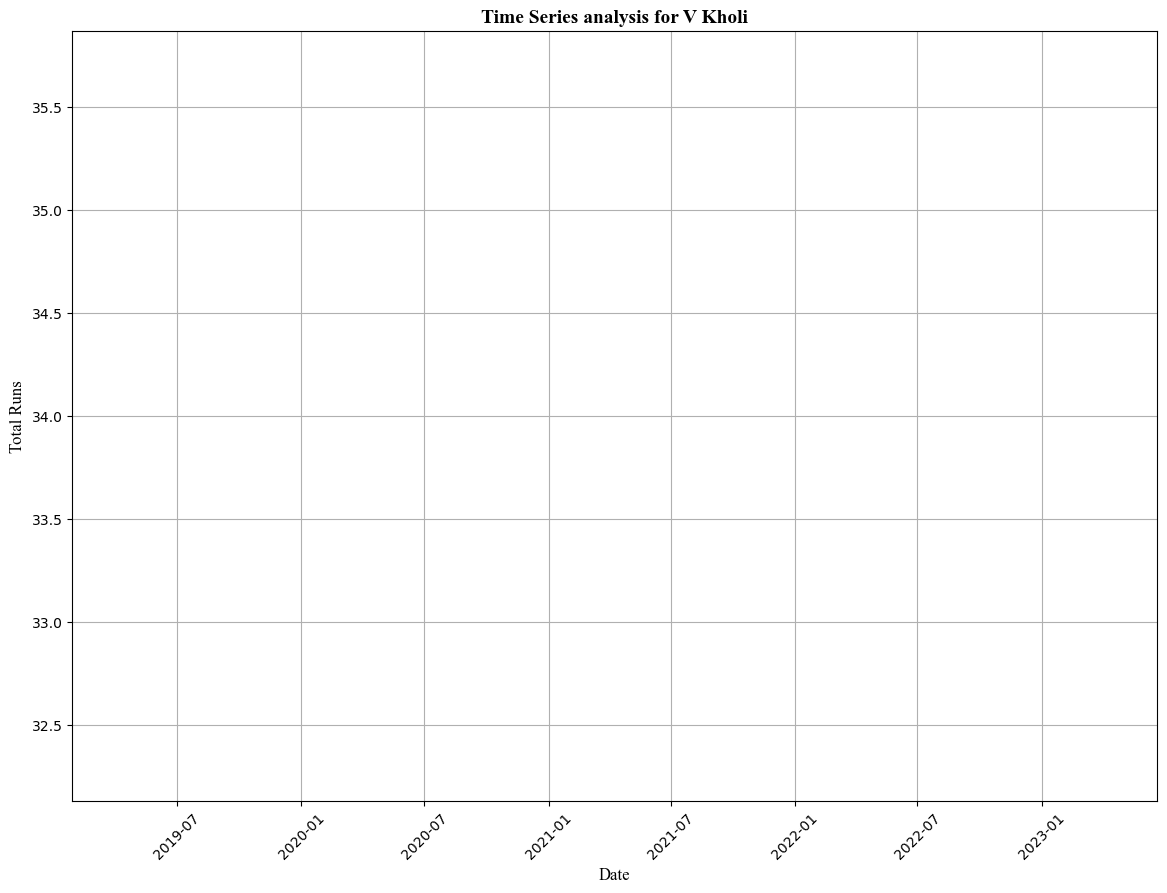

In [666]:
fig, ax = plt.subplots(figsize=(14, 10))

%matplotlib inline

def update(frame):
    ax.clear()
    current_data = daily_player_runs[daily_player_runs['dates'] <= frame]
    ax.plot(current_data['dates'], current_data['runs_total'], marker='', linestyle='-', color='b')
    ax.set_title('Time Series analysis for V Kholi', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
    ax.set_xlabel('Date', fontdict={'family': 'Times New Roman', 'size': 12})
    ax.set_ylabel('Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

ani = animation.FuncAnimation(fig, update, frames=pd.date_range(start=daily_player_runs['dates'].min(), end=daily_player_runs['dates'].max(), freq='D'), interval=200, repeat=False)

ani.save('animated_line_chart_kholi.html', writer='html')
HTML(open('animated_line_chart_kholi.html').read())

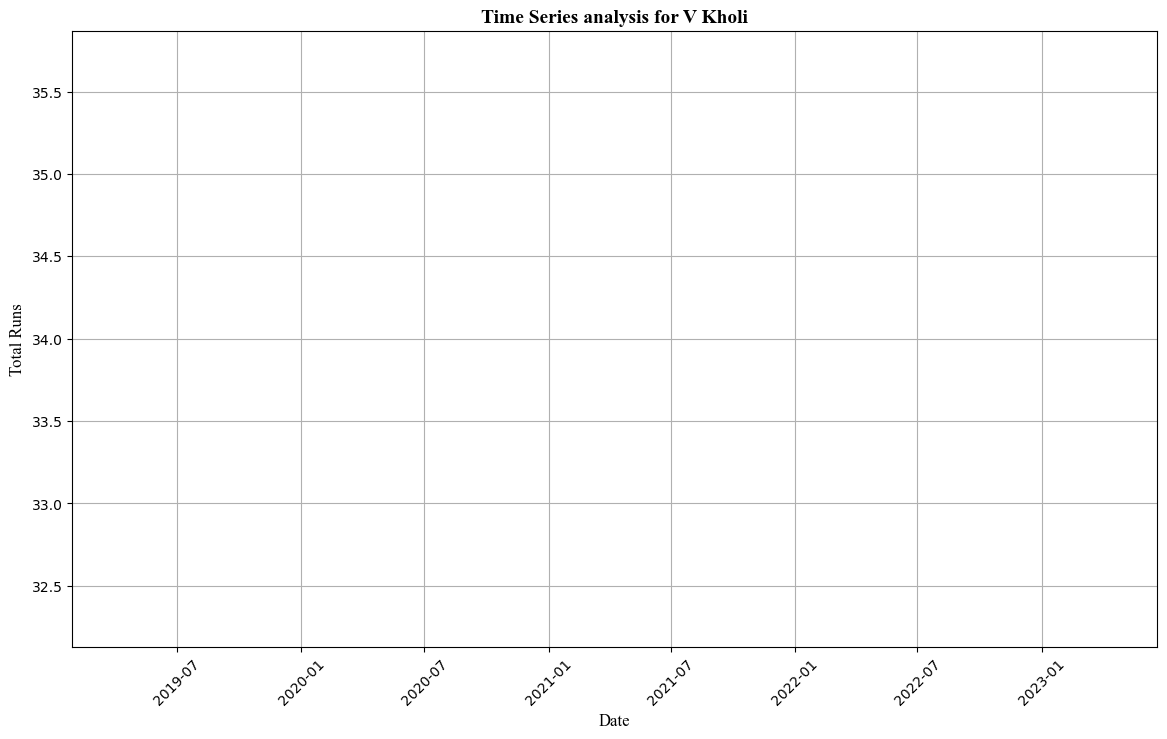

In [667]:
fig, ax = plt.subplots(figsize=(14, 8))

def update(frame):
    ax.clear()
    current_data = daily_player_runs[daily_player_runs['dates'] <= frame]
    ax.plot(current_data['dates'], current_data['runs_total'], marker='', linestyle='-', color='b')
    ax.set_title('Time Series analysis for V Kholi', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
    ax.set_xlabel('Date', fontdict={'family': 'Times New Roman', 'size': 12})
    ax.set_ylabel('Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

ani = animation.FuncAnimation(fig, update, frames=daily_player_runs['dates'], interval=200, repeat=False)

ani.save('player_animated_line_chart.html', writer='html')

HTML(open('player_animated_line_chart.html').read())

In [668]:
daily_player_runs.head()

,dates,runs_total
0,2021-04-09,34
1,2021-04-14,34
2,2021-04-18,6
3,2021-04-22,72
4,2021-04-25,10


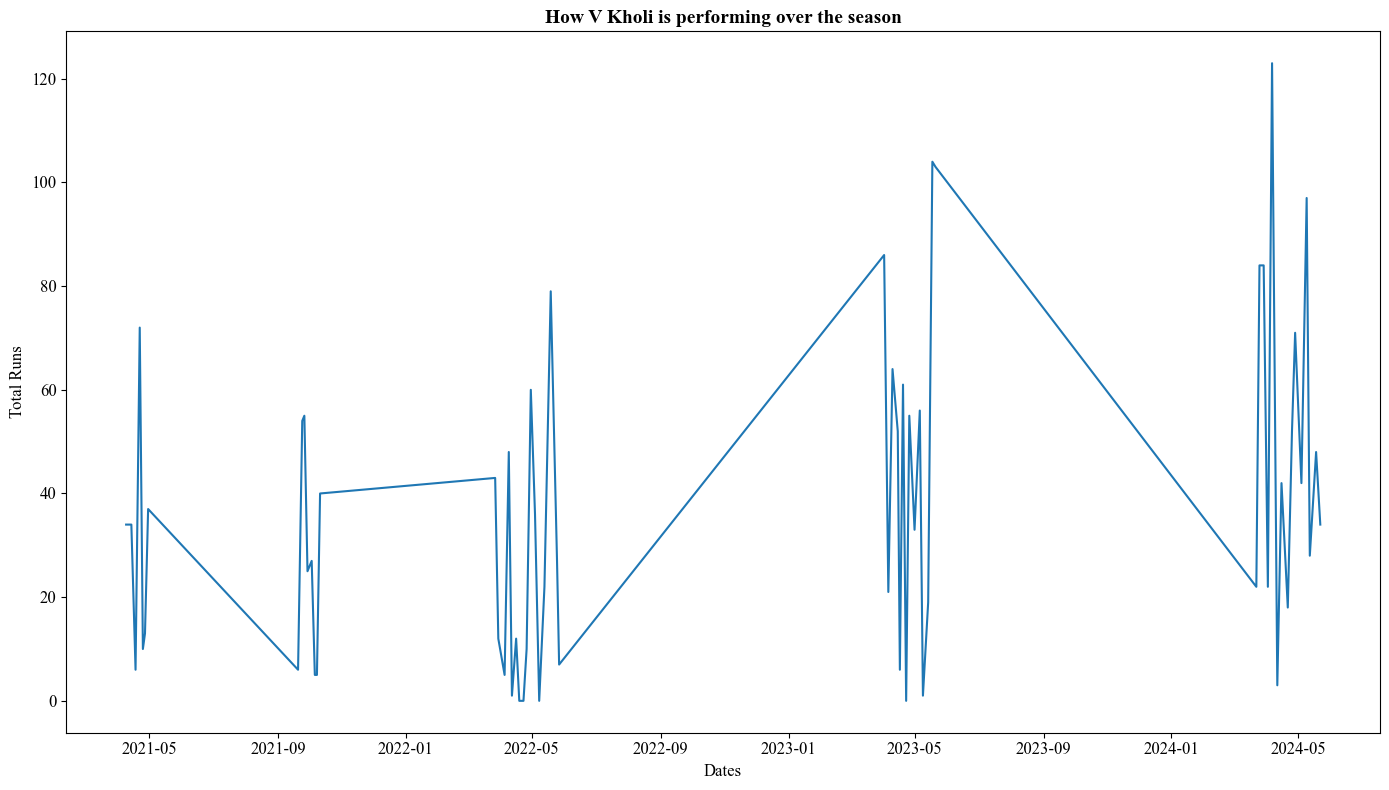

In [669]:
plt.figure(figsize=(14, 8))

plt.plot(daily_player_runs['dates'], daily_player_runs['runs_total'], linestyle='-')

plt.title('How V Kholi is performing over the season', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
plt.xlabel('Dates', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Total Runs', fontdict={'family': 'Times New Roman', 'size': 12})

plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig("kholi_performance_over_the_year.png")
plt.show()

## Predictive Analysis

In [1007]:
data.shape

(260268, 26)

In [1008]:
data.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball'],
      dtype='object')

In [1009]:
pred_df = data

In [673]:
pred_df['out'] = pred_df['wickets_player_out'].apply(lambda x: 1 if type(x) == type('str') else 0)
pred_df.shape

(260268, 27)

In [674]:
team_1 = 'Sunrisers Hyderabad'
team_2 = 'Kings XI Punjab'

match_id = '1426261.json'

In [675]:
pred_df[(pred_df.team_betting == team_1) & (pred_df.team_betting == team_2)].id.unique()

array([], dtype=object)

In [676]:
pred_df[pred_df.id == match_id].shape

(251, 27)

In [677]:
pred_df.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball', 'out'],
      dtype='object')

In [678]:
def calculate_probabilities(df, team):
    team_outs = pred_df[df.team_betting == team].out.sum()
    team_outcomes = pred_df[df.team_betting == team].runs_total.value_counts()
    
    team_outcomes_count = []
    
    outcomes = [0, 1, 2, 3, 4, 6, 'w']
    
    for outcome in outcomes:
        try:
            if outcome != 'w':
                team_outcomes_count.append(team_outcomes[outcome])
            else:
                team_outcomes_count.append(team_outs)
        except:
            team_outcomes_count.append(0)
    
    if sum(team_outcomes_count) == 0:
        pb = [0] * len(outcomes)
    else:
        pb = [i / sum(team_outcomes_count) for i in team_outcomes_count]
    
    return pb


In [679]:
t1_pb = calculate_probabilities(pred_df, team_1)
t2_pb = calculate_probabilities(pred_df, team_2)

In [680]:
t1_pb, t2_pb

([0.32418781567624866,
  0.4066533640955291,
  0.06827960341709796,
  0.003959593440169608,
  0.10522541622497973,
  0.044210263765043334,
  0.04748394338093159],
 [0.3313085621970921,
  0.39121163166397416,
  0.06413570274636511,
  0.003037156704361874,
  0.11218093699515347,
  0.04872374798061389,
  0.049402261712439416])

In [681]:
import numpy as np
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [682]:
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    # Initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # Calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number * 6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs

In [683]:
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # Initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # Calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number * 6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs

In [684]:
m_df = pred_df[pred_df.id == match_id]
m_df.reset_index(inplace = True, drop = True)
df_ing1 = m_df[m_df.team_betting == team_1]
df_ing2 = m_df[m_df.team_betting == team_2]
df_ing1 = df_ing1.sort_values('actual_ball', ascending = True)
df_ing2 = df_ing2.sort_values('actual_ball', ascending = True)
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [685]:
# m_df.team_betting[230]

In [686]:
df_ing1.columns

Index(['id', 'created', 'city', 'dates', 'outcome_winner', 'outcome_by_runs',
       'outcome_by_wickets', 'player_of_match', 'team_1', 'team_2', 'season',
       'toss_winner', 'toss_decision', 'venue', 'team_betting', 'over_number',
       'ball_number', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wickets_player_out', 'wickets_kind',
       'actual_ball', 'out'],
      dtype='object')

In [687]:
df_ing2.shape

(126, 27)

In [688]:
ing1_actual_score = df_ing1['runs_total'].sum()
ing2_actual_score = df_ing2['runs_total'].sum()

In [689]:
ing1_actual_score, ing2_actual_score

(182, 180)

In [690]:
def simulate_runs_innings_1(df_ing1):
    curr_score = 0
    curr_wickets = 0
    curr_overs = 0.0
    ing1_runs_pred = []

    for i in range(len(df_ing1)):
        curr_score += df_ing1.runs_total[i]
        curr_overs = df_ing1.actual_ball[i]
        curr_wickets += df_ing1.out[i]
        prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
        ing1_runs_pred.append(prediction)
    
    return ing1_runs_pred

In [691]:
def simulate_runs_innings_2(df_ing2, target_score):
    curr_score = 0
    curr_wickets = 0
    curr_overs = 0.0
    ing2_runs_pred = []

    for i in range(len(df_ing2)):
        curr_score += df_ing2.runs_total[i]
        curr_overs = df_ing2.actual_ball[i]
        curr_wickets += df_ing2.out[i]
        prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target_score)
        ing2_runs_pred.append(prediction)
    
    return ing2_runs_pred


In [692]:
ing1_runs_pred = simulate_runs_innings_1(df_ing1)

In [693]:
target_score = sum(df_ing1.runs_total)
ing2_runs_pred = simulate_runs_innings_2(df_ing2, target_score)

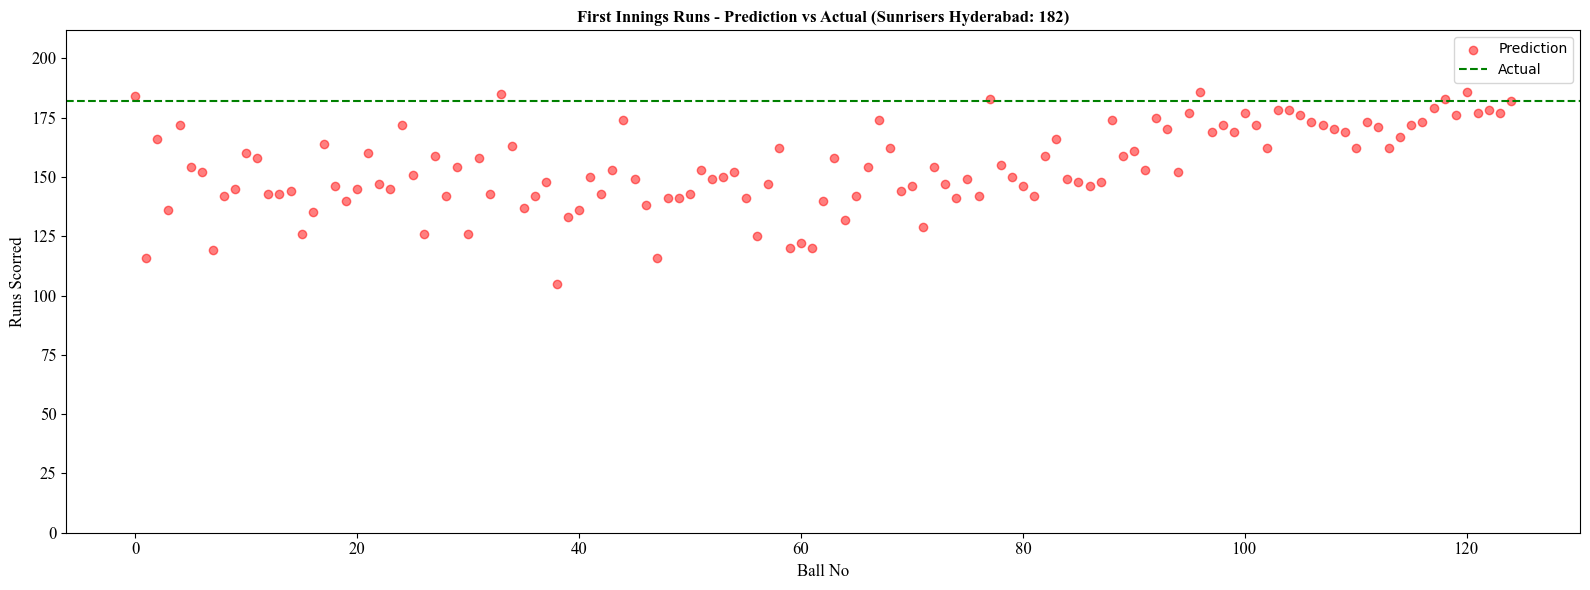

In [1010]:
plt.figure(figsize=(16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha=0.5, label='Prediction', color='red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls='--', label='Actual', color='green')
plt.title('First Innings Runs - Prediction vs Actual (' + team_1 + ': ' + str(ing1_actual_score) + ')', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.legend()
plt.xlabel('Ball No', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Runs Scorred', fontdict={'family': 'Times New Roman', 'size': 12})
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig("srh_inning_score.png")

plt.show()

In [695]:
error_1st_innings = np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])
print('Error in 1st Innings runs:', error_1st_innings)

Error in 1st Innings runs: 28.008


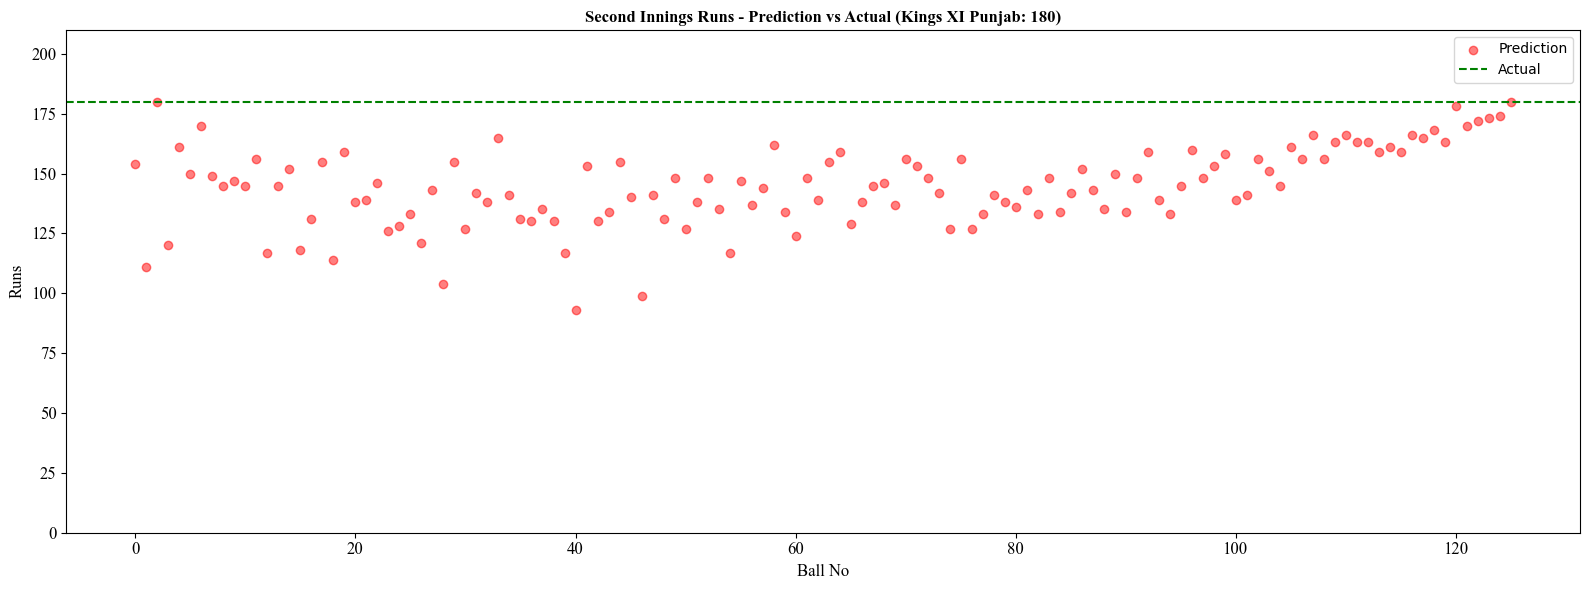

In [1012]:
plt.figure(figsize=(16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha=0.5, label='Prediction', color='red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls='--', label='Actual', color='green')
plt.title('Second Innings Runs - Prediction vs Actual (' + team_2 + ': ' + str(ing2_actual_score) + ')', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Ball No', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Runs', fontdict={'family': 'Times New Roman', 'size': 12})
plt.legend()
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig("kxip_inning_score.png")
plt.show()

In [697]:
error_2nd_innings = np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])
print('Error in 2nd Innings runs:', error_2nd_innings)

Error in 2nd Innings runs: 35.32539682539682


In [698]:
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

In [699]:
for i in range(len(df_ing1)):
    ing1_curr_score += df_ing1.runs_total[i]
    ing1_curr_overs = df_ing1.actual_ball[i]
    ing1_curr_wickets += df_ing1.out[i]

    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0

    for j in range(100):
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)

        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1

    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)

    win_count = 0
    tie_count = 0
    lose_count = 0

In [700]:
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

In [701]:
for i in range(len(df_ing2)):
    target = ing1_actual_score  # Ensure ing1_actual_score is defined

    ing2_curr_score += df_ing2.runs_total[i]
    ing2_curr_wickets += df_ing2.out[i]
    ing2_curr_overs = df_ing2.actual_ball[i]

    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)

        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1

    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)

    win_count = 0
    tie_count = 0
    lose_count = 0

In [702]:
print(lose_count_ls)

[42, 40, 50, 44, 46, 39, 38, 38, 42, 38, 48, 37, 46, 46, 53, 49, 47, 48, 53, 50, 43, 58, 43, 42, 43, 41, 36, 34, 28, 41, 44, 47, 50, 47, 41, 39, 33, 44, 33, 39, 35, 47, 42, 30, 30, 32, 35, 35, 48, 40, 35, 50, 26, 39, 26, 28, 37, 40, 42, 36, 26, 27, 27, 31, 48, 45, 40, 42, 40, 44, 35, 31, 57, 45, 52, 53, 50, 51, 55, 48, 47, 49, 42, 55, 55, 55, 56, 50, 57, 68, 74, 75, 81, 76, 79, 84, 85, 94, 83, 92, 90, 89, 84, 89, 88, 87, 93, 82, 80, 95, 85, 88, 89, 79, 87, 86, 90, 92, 95, 94, 93, 91, 95, 87, 95, 96, 98, 96, 96, 100, 98, 98, 100, 98, 100, 100, 99, 99, 100, 98, 98, 99, 100, 100, 100, 100, 99, 99, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 99, 100, 100, 99, 100, 99, 100, 100, 100, 99, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

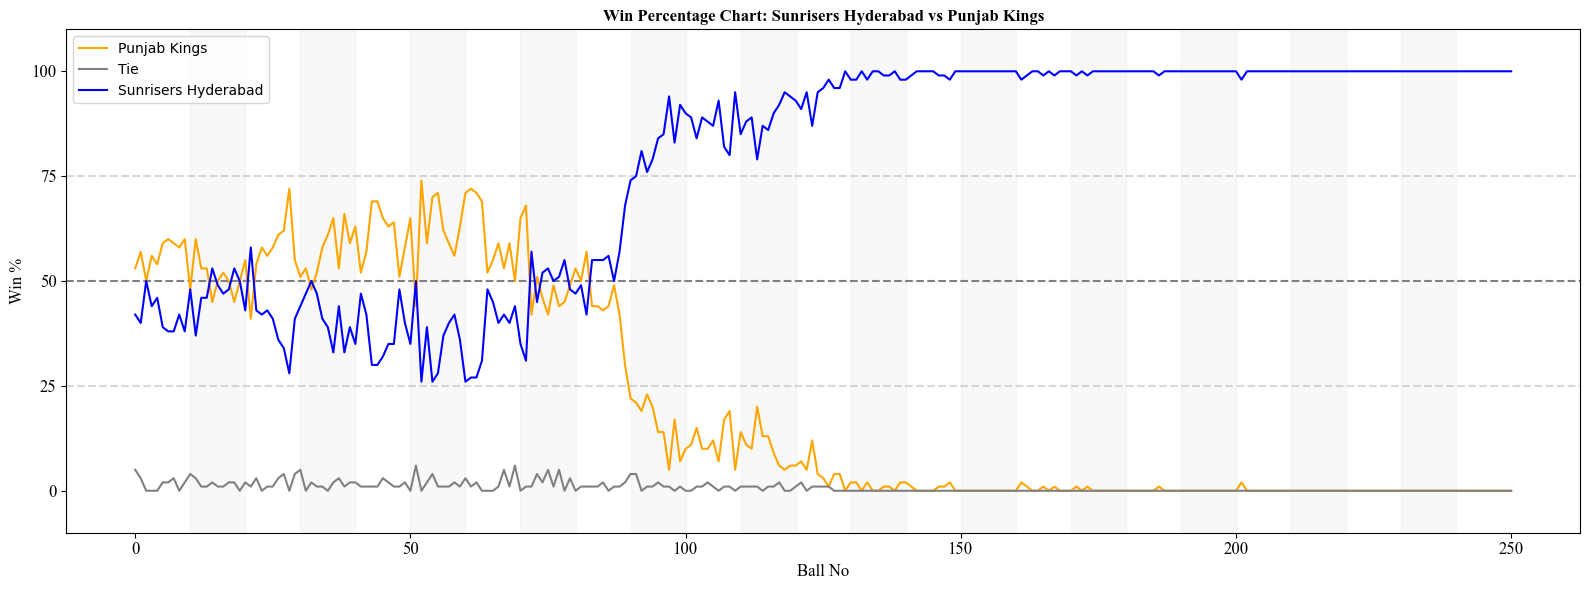

In [1015]:
# Create the win percentage chart
plt.figure(figsize=(16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(x1_values), 20):
    if i < len(x1_values) - 10:
        plt.axvspan(i, i + 10, ymin=0, ymax=100, alpha=0.05, color='grey')

plt.axhline(y=75, ls='--', alpha=0.3, c='grey')
plt.axhline(y=50, ls='--', alpha=1, c='grey')
plt.axhline(y=25, ls='--', alpha=0.3, c='grey')

plt.plot(x1_values, y1_values, color='orange', label='Punjab Kings')
plt.plot(x2_values, y2_values, color='grey', label='Tie')
plt.plot(x3_values, y3_values, color='blue', label='Sunrisers Hyderabad')

plt.ylim(0 -10, 100 + 10)
plt.yticks([0, 25, 50, 75, 100])
# plt.xticks([0, 25, 50, 75, 100])

plt.title('Win Percentage Chart: Sunrisers Hyderabad vs Punjab Kings', fontdict={'family': 'Times New Roman', 'size': 12, 'weight': 'bold'})
plt.xlabel('Ball No', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel('Win %', fontdict={'family': 'Times New Roman', 'size': 12})
plt.legend()
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

plt.tight_layout()
plt.savefig("win_percentage.png")
plt.show()